In [79]:
a_counts[0,first_shot:last_shot-offset, ]

array([[3388., 3107., 3075., ...,    0.,    0.,    0.],
       [3431., 3161., 3191., ...,    0.,    0.,    0.],
       [3446., 3216., 3128., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [78]:
b_counts[0,first_shot:last_shot-offset,]

array([[4018., 4119., 4156., ...,    0.,    0.,    0.],
       [4182., 4114., 4094., ...,    0.,    0.,    0.],
       [4097., 4171., 4181., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [6]:
# This does NOT generate interactive plots
#%matplotlib inline  

# This generates interactive plots
%matplotlib notebook 

average scattering photons:  8616.635193133046
bin: 0
average signal size 3016.316165951359
average asymmetry -0.48001403314925645
std of asymmetry 0.07518199851824083
error of asymmetry 0.002010760199945735


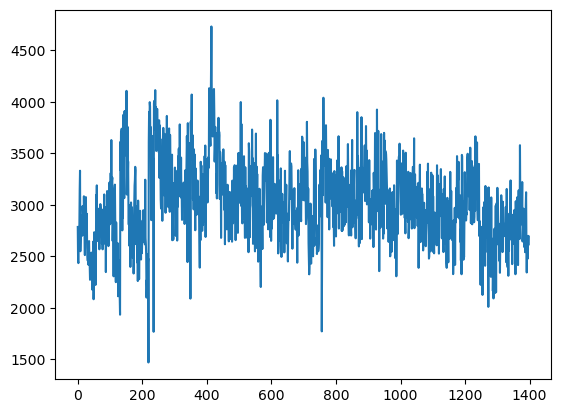

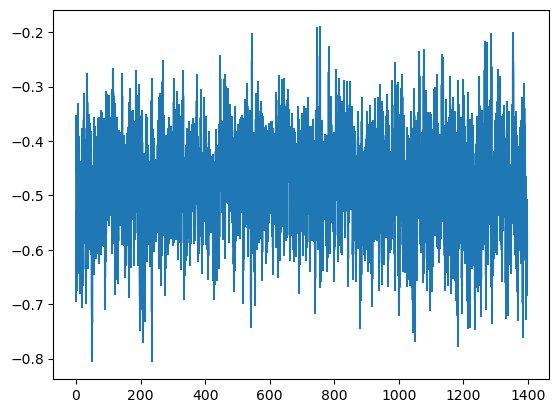

bin: 0
average signal size filtered 3016.316165951359
average asymmetry filtered -0.48001403314925645
std of asymmetry filtered 0.07518199851824083
error of asymmetry filtered 0.002010760199945735


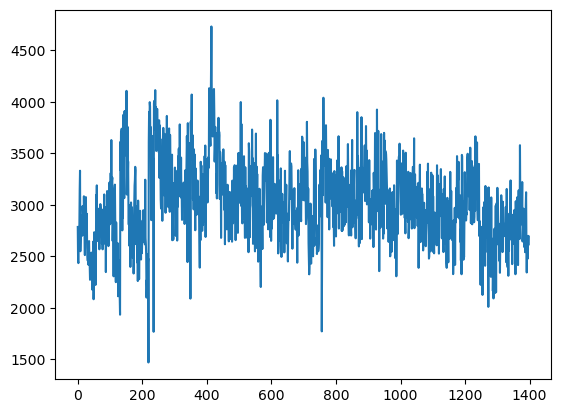

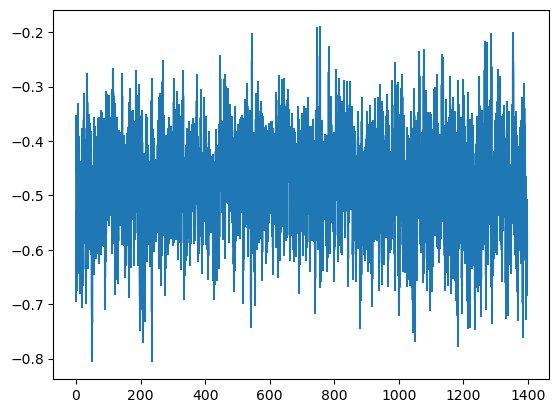

number of useful shots: 1398


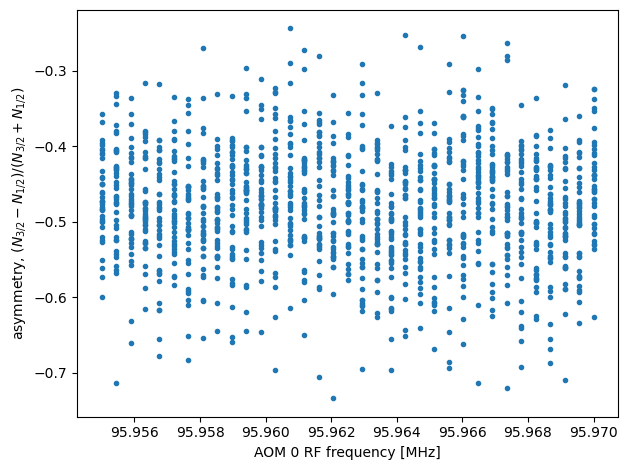

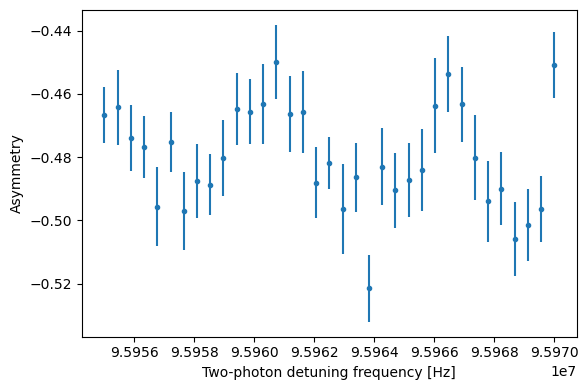

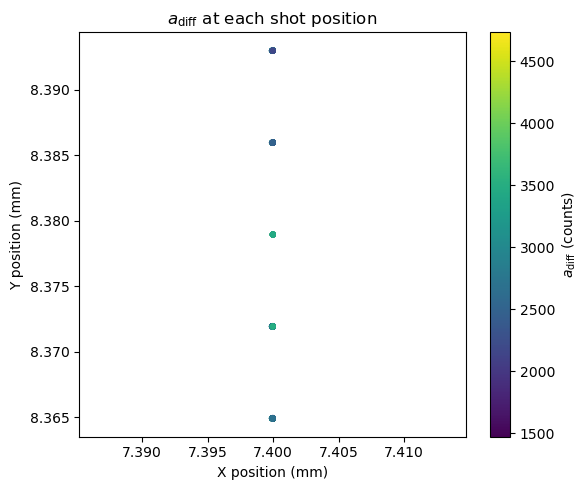

asymmetry difference -0.0023475970911021604


In [5]:
#the code that does NOT assume photon counts limited by shot noise, correct one


scattering_bins = [1]
#scattering_bins = [9,10,11,12,13,14,15]

import numpy as np
import matplotlib.pyplot as plt

def asymmetry_error_calculation(a_diff, b_diff, a_noise, b_noise, rho=0.0):
    a = np.asarray(a_diff)
    b = np.asarray(b_diff)
    sa = np.asarray(a_noise)
    sb = np.asarray(b_noise)
    s = a + b

    # correlation term
    cov = rho * sa * sb

    varA = (4.0 / s**4) * ( (b**2)*(sa**2) + (a**2)*(sb**2) - 2.0*a*b*cov )
    # handle divide-by-zero gracefully
    varA = np.where(s==0, np.nan, varA)

    return np.sqrt(varA)

#save_folder = '/home/harish/Hutzler Lab Dropbox/HutzlerLabShared/Personal/HarishRamachandran/data/'
save_folder = 'F:\\Hutzler Lab Dropbox\\HutzlerLabData\\Orange Beam Source\\PXI Data\\20260116\\'
scan_number = 101
data = np.load(save_folder+f'scan_{scan_number}.npz')
a_counts = data['a_counts']
b_counts = data['b_counts']
frequencies_0 = data['frequencies_0']



offset = 0
signal_bin = 0
first_shot = 1
last_shot = len(a_counts[0])-1

print('average scattering photons: ', np.mean(np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1)))


a_diff = (a_counts[0,first_shot:last_shot-offset,signal_bin] - np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
b_diff = (b_counts[0,first_shot:last_shot-offset,signal_bin] - np.mean(b_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
a_noise = np.sqrt(a_counts[0,first_shot:last_shot-offset,signal_bin])
b_noise = np.sqrt(b_counts[0,first_shot:last_shot-offset,signal_bin])

'''
a_diff = (a_counts[0,first_shot:last_shot-offset,1] + a_counts[0,first_shot:last_shot-offset,2] - 2*np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
b_diff = (b_counts[0,first_shot:last_shot-offset,1] + b_counts[0,first_shot:last_shot-offset,2] - 2*np.mean(b_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
a_noise = 0*np.sqrt(a_counts[0,first_shot:last_shot-offset,signal_bin])
b_noise = 0*np.sqrt(b_counts[0,first_shot:last_shot-offset,signal_bin])
'''

freq_plot = frequencies_0[first_shot+offset:last_shot]
sum_counts = a_diff + b_diff
difference_counts = a_diff - b_diff

asymmetry = difference_counts/sum_counts

print('bin:', signal_bin)
print('average signal size',np.mean(sum_counts))
print('average asymmetry',np.mean(asymmetry))
print('std of asymmetry',np.std(asymmetry))
print('error of asymmetry',np.std(asymmetry)/np.sqrt(len(asymmetry)))

plt.figure(10)
plt.plot(sum_counts)
plt.show()


plt.figure(11)
plt.errorbar(range(len(asymmetry)),asymmetry, yerr = asymmetry_error_calculation(a_diff, b_diff, a_noise, b_noise, rho=0.0))
plt.show()


filter_outliers = np.logical_and(np.logical_and(sum_counts > 800, asymmetry < 1.1),
                                 np.logical_and(sum_counts < 1000000, asymmetry > -1.1))
a_diff_filt = a_diff[filter_outliers]
b_diff_filt = b_diff[filter_outliers]
freq_plot_filt = freq_plot[filter_outliers]
a_noise_filt = a_noise[filter_outliers]
b_noise_filt = b_noise[filter_outliers]

sum_counts_filt = a_diff_filt + b_diff_filt
difference_counts_filt = a_diff_filt - b_diff_filt

asymmetry_filt = difference_counts_filt/sum_counts_filt

print('bin:', signal_bin)
print('average signal size filtered',np.mean(sum_counts_filt))
print('average asymmetry filtered',np.mean(asymmetry_filt))
print('std of asymmetry filtered',np.std(asymmetry_filt))
print('error of asymmetry filtered',np.std(asymmetry_filt)/np.sqrt(len(asymmetry_filt)))

plt.figure(10342534)
plt.plot(sum_counts_filt)
plt.show()


plt.figure(135431)
plt.errorbar(range(len(asymmetry_filt)),asymmetry_filt, yerr = asymmetry_error_calculation(a_diff_filt, b_diff_filt, a_noise_filt, b_noise_filt, rho=0.0))
plt.show()



num_useful_shots = len(freq_plot_filt)
print('number of useful shots:',num_useful_shots)

plt.figure(12)
plt.plot(freq_plot_filt/1e6, asymmetry_filt, marker='.', linestyle='')
plt.xlabel('AOM 0 RF frequency [MHz]')
plt.ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$')
#plt.text(101.52, -0.25, r'$N$ ='+f' {num_useful_shots}', horizontalalignment='right')
plt.tight_layout()
#plt.savefig('single_shot.pdf')
plt.show()

import numpy as np
import matplotlib.pyplot as plt

def average_and_error_at_frequency(freq_plot_filt, asymmetry_filt):
    """Averages asymmetry values and calculates the standard error for each unique frequency.

    Args:
        freq_plot_filt: 1D numpy array of frequencies.
        asymmetry_filt: 1D numpy array of asymmetry values (same size as freq_plot_filt).

    Returns:
        tuple: (unique_frequencies, averaged_asymmetries, errors)
               where unique_frequencies is a sorted 1D numpy array of unique frequencies,
               averaged_asymmetries is a 1D numpy array of corresponding averaged
               asymmetry values, and errors is a 1D numpy array of the standard errors.
               Returns empty arrays if input arrays are empty or of different sizes.
    """
    if not freq_plot_filt.size or not asymmetry_filt.size or freq_plot_filt.size != asymmetry_filt.size:
        return np.array([]), np.array([]), np.array([])

    unique_freqs = np.unique(freq_plot_filt)
    averaged_asymmetries = []
    errors = []

    for freq in unique_freqs:
        indices = np.where(freq_plot_filt == freq)[0]
        asymmetries_at_freq = asymmetry_filt[indices]
        average_asymmetry = np.mean(asymmetries_at_freq)
        std_dev = np.std(asymmetries_at_freq)
        num_points = len(asymmetries_at_freq)
        error = std_dev / np.sqrt(num_points) if num_points > 0 else 0 # Handle cases where num_points is 0 to avoid ZeroDivisionError
        averaged_asymmetries.append(average_asymmetry)
        errors.append(error)

    return unique_freqs, np.array(averaged_asymmetries), np.array(errors)


unique_freqs, averaged_asymmetries, asymmetry_err = average_and_error_at_frequency(freq_plot_filt, asymmetry_filt)

plt.figure(figsize=(6,4))
plt.errorbar(unique_freqs, averaged_asymmetries,yerr=asymmetry_err, xerr=0, marker='.', linestyle='')
plt.xlabel('Two-photon detuning frequency [Hz]')
plt.ylabel('Asymmetry')
plt.tight_layout()
plt.show()

       

pos_x = data['pos_xs'][0][first_shot:last_shot-offset]
pos_y = data['pos_ys'][0][first_shot:last_shot-offset]
mask = ~((pos_x == 0) & (pos_y == 0))
pos_x, pos_y, values = pos_x[mask], pos_y[mask], sum_counts[mask]

import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sc = plt.scatter(
    pos_x, pos_y, 
    c=values,               # color = a_diff
    cmap='viridis',         # or 'plasma', 'coolwarm', …
    marker='o',             # square markers look grid-like
    s=20,                   # adjust point size
    edgecolor='none'
)
plt.xlabel('X position (mm)')
plt.ylabel('Y position (mm)')
plt.title(r'$a_{\rm diff}$ at each shot position')
plt.axis('equal')
cbar = plt.colorbar(sc, label=r'$a_{\rm diff}$ (counts)')
plt.tight_layout()
plt.show()

print('asymmetry difference', averaged_asymmetries[0] - averaged_asymmetries[1])

<IPython.core.display.Javascript object>


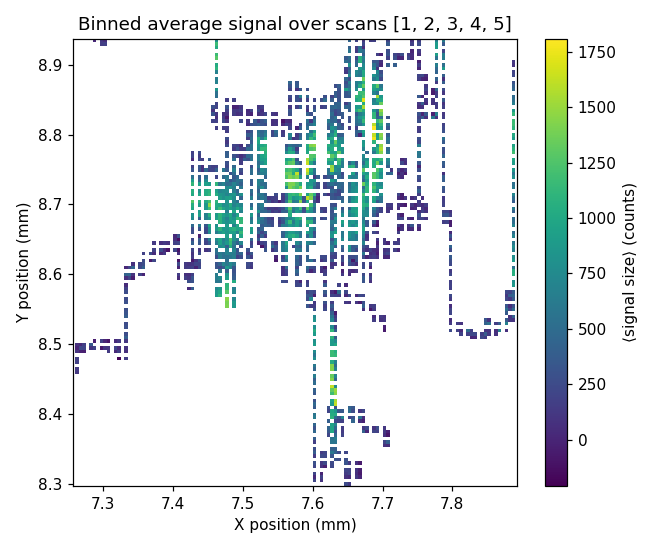

<IPython.core.display.Javascript object>


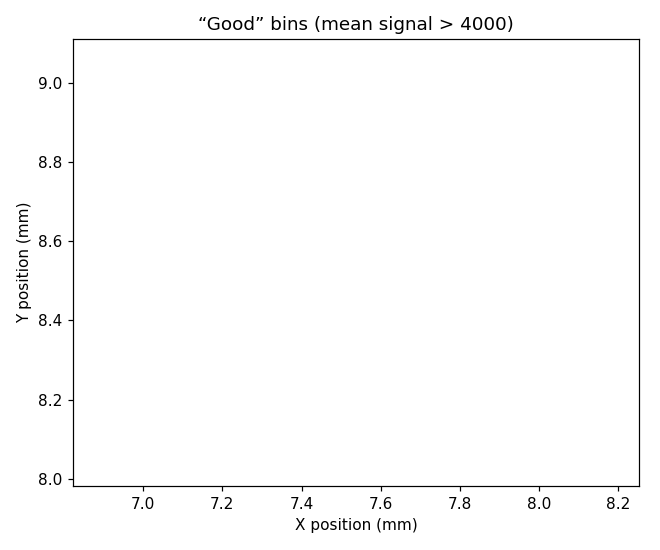

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 1) PARAMETERS
save_folder = r'F:\Hutzler Lab Dropbox\HutzlerLabData\Orange Beam Source\PXI Data\20251202'
analyzescans = [1,2,3,4,5]     # <-- list all the scan numbers you want
grid_size = 0.005                    # mm, your desired bin width in x and y

# 2) ACCUMULATE ALL POINTS ACROSS SCANS
all_x = []
all_y = []
all_val = []   # e.g. sum_counts
scatering_bins = [1]

for scan_number in analyzescans:
    fname = os.path.join(save_folder, f'scan_{scan_number}.npz')
    data = np.load(fname)
    # extract your per-shot arrays exactly as you did before
    a_counts = data['a_counts']
    b_counts = data['b_counts']
    pos_x = data['pos_xs'][0]
    pos_y = data['pos_ys'][0]

    # trim first/last shots and offset exactly as before
    first_shot = 0
    last_shot = len(a_counts[0]) - 1
    offset = 1

    # compute the sum_counts for each shot
    a_diff = (a_counts[0, first_shot:last_shot-offset, 1] 
              - np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
    b_diff = (b_counts[0, first_shot:last_shot-offset, 1] 
              - np.mean(b_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
    sum_counts = a_diff + b_diff

    
    # mask out the (0,0) "invalid" positions
    xs = pos_x[first_shot:last_shot-offset]
    ys = pos_y[first_shot:last_shot-offset]
    valid = ~((xs == 0) & (ys == 0))

    all_x.append(xs[valid])
    all_y.append(ys[valid])
    all_val.append(sum_counts[valid])

# concatenate across scans
all_x = np.concatenate(all_x)
all_y = np.concatenate(all_y)
all_val = np.concatenate(all_val)

# 3) DEFINE GRID
xmin, xmax = all_x.min(), all_x.max()
ymin, ymax = all_y.min(), all_y.max()

# edges that cover full range
x_edges = np.arange(xmin, xmax + grid_size, grid_size)
y_edges = np.arange(ymin, ymax + grid_size, grid_size)

# 4) BINNING: compute sum and counts per bin
# digitize gives bin index for each point
ix = np.digitize(all_x, x_edges) - 1
iy = np.digitize(all_y, y_edges) - 1

# prepare accumulator arrays
sum_grid   = np.zeros((len(x_edges)-1, len(y_edges)-1))
count_grid = np.zeros_like(sum_grid)

# accumulate
for xind, yind, val in zip(ix, iy, all_val):
    if 0 <= xind < sum_grid.shape[0] and 0 <= yind < sum_grid.shape[1]:
        sum_grid[xind, yind]   += val
        count_grid[xind, yind] += 1

# compute average signal per bin (avoid divide by zero)
with np.errstate(divide='ignore', invalid='ignore'):
    mean_grid = sum_grid / count_grid
    mean_grid[count_grid == 0] = np.nan   # mask empty bins

# 5) PLOT A HEATMAP
Xc = x_edges[:-1] + grid_size/2
Yc = y_edges[:-1] + grid_size/2
Xc, Yc = np.meshgrid(Xc, Yc, indexing='xy')

plt.figure(figsize=(6,5))
pcm = plt.pcolormesh(
    x_edges, y_edges, mean_grid.T, 
    shading='auto', cmap='viridis'
)
plt.colorbar(pcm, label='⟨signal size⟩ (counts)')
plt.xlabel('X position (mm)')
plt.ylabel('Y position (mm)')
plt.title(f'Binned average signal over scans {analyzescans}')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 6) OPTIONALLY: define “good” bins by some criterion, e.g. mean_grid > threshold
threshold = 4000  # your choice
good_mask = mean_grid > threshold

plt.figure(figsize=(6,5))
plt.pcolormesh(
    x_edges, y_edges, good_mask.T, 
    shading='auto', cmap='gray_r'
)
plt.xlabel('X position (mm)')
plt.ylabel('Y position (mm)')
plt.title('“Good” bins (mean signal > %d)' % threshold)
plt.axis('equal')
plt.tight_layout()
plt.show()


average scattering photons:  25935.059216013346
bin: 0
average signal size 4537.145120934112
average asymmetry -0.7479642701504902
std of asymmetry 0.984374333983384
error of asymmetry 0.028428286923746826
bin: 0
average signal size filtered 5323.99052631579
average asymmetry filtered -0.7467168587208021
std of asymmetry filtered 0.08496331908930135
error of asymmetry filtered 0.002756574073330582
number of useful shots: 950


<IPython.core.display.Javascript object>


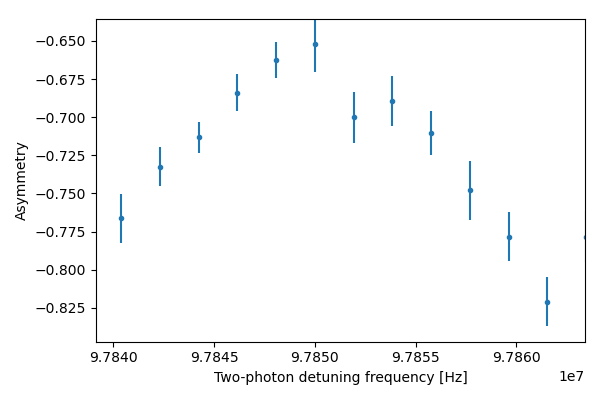

<IPython.core.display.Javascript object>


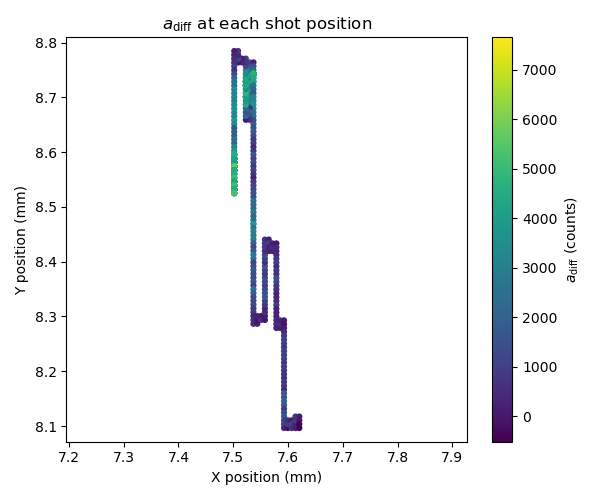

asymmetry difference 0.015550680020301466


In [100]:
#the code that does NOT assume photon counts limited by shot noise, correct one


scattering_bins = [1]
#scattering_bins = [9,10,11,12,13,14,15]

import numpy as np
import matplotlib.pyplot as plt

def asymmetry_error_calculation(a_diff, b_diff, a_noise, b_noise, rho=0.0):
    a = np.asarray(a_diff)
    b = np.asarray(b_diff)
    sa = np.asarray(a_noise)
    sb = np.asarray(b_noise)
    s = a + b

    # correlation term
    cov = rho * sa * sb

    varA = (4.0 / s**4) * ( (b**2)*(sa**2) + (a**2)*(sb**2) - 2.0*a*b*cov )
    # handle divide-by-zero gracefully
    varA = np.where(s==0, np.nan, varA)

    return np.sqrt(varA)

#save_folder = '/home/harish/Hutzler Lab Dropbox/HutzlerLabShared/Personal/HarishRamachandran/data/'
save_folder = 'F:\\Hutzler Lab Dropbox\\HutzlerLabData\\Orange Beam Source\\PXI Data\\20251114\\'
scan_number = 1001

data = np.load(save_folder+f'scan_{scan_number}.npz')
a_counts = data['a_counts']
b_counts = data['b_counts']
frequencies_0 = data['frequencies_0']


offset = 0
signal_bin = 0
first_shot = 0
last_shot = len(a_counts[0])-1

print('average scattering photons: ', np.mean(np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1)))

#'''
a_diff = (a_counts[0,first_shot:last_shot-offset,signal_bin] - np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
b_diff = (b_counts[0,first_shot:last_shot-offset,signal_bin] - np.mean(b_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
a_noise = np.sqrt(a_counts[0,first_shot:last_shot-offset,signal_bin])
b_noise = np.sqrt(b_counts[0,first_shot:last_shot-offset,signal_bin])

'''
a_diff = (a_counts[0,first_shot:last_shot-offset,1] + a_counts[0,first_shot:last_shot-offset,2] - 2*np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
b_diff = (b_counts[0,first_shot:last_shot-offset,1] + b_counts[0,first_shot:last_shot-offset,2] - 2*np.mean(b_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
'''


freq_plot = frequencies_0[first_shot+offset:last_shot]
sum_counts = a_diff + b_diff
difference_counts = a_diff - b_diff

asymmetry = difference_counts/sum_counts

print('bin:', signal_bin)
print('average signal size',np.mean(sum_counts))
print('average asymmetry',np.mean(asymmetry))
print('std of asymmetry',np.std(asymmetry))
print('error of asymmetry',np.std(asymmetry)/np.sqrt(len(asymmetry)))

plt.figure(10)
plt.plot(sum_counts)
plt.show()


plt.figure(11)
plt.errorbar(range(len(asymmetry)),asymmetry, yerr = asymmetry_error_calculation(a_diff, b_diff, a_noise, b_noise, rho=0.0))
plt.show()


filter_outliers = np.logical_and(np.logical_and(sum_counts > 4000, asymmetry < 1.1),
                                 np.logical_and(sum_counts < 60500, asymmetry > -1.1))
a_diff_filt = a_diff[filter_outliers]
b_diff_filt = b_diff[filter_outliers]
freq_plot_filt = freq_plot[filter_outliers]
a_noise_filt = a_noise[filter_outliers]
b_noise_filt = b_noise[filter_outliers]

sum_counts_filt = a_diff_filt + b_diff_filt
difference_counts_filt = a_diff_filt - b_diff_filt

asymmetry_filt = difference_counts_filt/sum_counts_filt

print('bin:', signal_bin)
print('average signal size filtered',np.mean(sum_counts_filt))
print('average asymmetry filtered',np.mean(asymmetry_filt))
print('std of asymmetry filtered',np.std(asymmetry_filt))
print('error of asymmetry filtered',np.std(asymmetry_filt)/np.sqrt(len(asymmetry_filt)))

plt.figure(10342534)
plt.plot(sum_counts_filt)
plt.show()


plt.figure(135431)
plt.errorbar(range(len(asymmetry_filt)),asymmetry_filt, yerr = asymmetry_error_calculation(a_diff_filt, b_diff_filt, a_noise_filt, b_noise_filt, rho=0.0))
plt.show()



num_useful_shots = len(freq_plot_filt)
print('number of useful shots:',num_useful_shots)

plt.figure(12)
plt.plot(freq_plot_filt/1e6, asymmetry_filt, marker='.', linestyle='')
plt.xlabel('AOM 0 RF frequency [MHz]')
plt.ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$')
#plt.text(101.52, -0.25, r'$N$ ='+f' {num_useful_shots}', horizontalalignment='right')
plt.tight_layout()
#plt.savefig('single_shot.pdf')
plt.show()

import numpy as np
import matplotlib.pyplot as plt

def average_and_error_at_frequency(freq_plot_filt, asymmetry_filt):
    """Averages asymmetry values and calculates the standard error for each unique frequency.

    Args:
        freq_plot_filt: 1D numpy array of frequencies.
        asymmetry_filt: 1D numpy array of asymmetry values (same size as freq_plot_filt).

    Returns:
        tuple: (unique_frequencies, averaged_asymmetries, errors)
               where unique_frequencies is a sorted 1D numpy array of unique frequencies,
               averaged_asymmetries is a 1D numpy array of corresponding averaged
               asymmetry values, and errors is a 1D numpy array of the standard errors.
               Returns empty arrays if input arrays are empty or of different sizes.
    """
    if not freq_plot_filt.size or not asymmetry_filt.size or freq_plot_filt.size != asymmetry_filt.size:
        return np.array([]), np.array([]), np.array([])

    unique_freqs = np.unique(freq_plot_filt)
    averaged_asymmetries = []
    errors = []

    for freq in unique_freqs:
        indices = np.where(freq_plot_filt == freq)[0]
        asymmetries_at_freq = asymmetry_filt[indices]
        average_asymmetry = np.mean(asymmetries_at_freq)
        std_dev = np.std(asymmetries_at_freq)
        num_points = len(asymmetries_at_freq)
        error = std_dev / np.sqrt(num_points) if num_points > 0 else 0 # Handle cases where num_points is 0 to avoid ZeroDivisionError
        averaged_asymmetries.append(average_asymmetry)
        errors.append(error)

    return unique_freqs, np.array(averaged_asymmetries), np.array(errors)


unique_freqs, averaged_asymmetries, asymmetry_err = average_and_error_at_frequency(freq_plot_filt, asymmetry_filt)

plt.figure(figsize=(6,4))
plt.errorbar(unique_freqs, averaged_asymmetries,yerr=asymmetry_err, xerr=0, marker='.', linestyle='')
plt.xlabel('Two-photon detuning frequency [Hz]')
plt.ylabel('Asymmetry')
plt.tight_layout()
plt.show()

       

pos_x = data['pos_xs'][0][first_shot:last_shot-offset]
pos_y = data['pos_ys'][0][first_shot:last_shot-offset]
mask = ~((pos_x == 0) & (pos_y == 0))
pos_x, pos_y, values = pos_x[mask], pos_y[mask], sum_counts[mask]

import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sc = plt.scatter(
    pos_x, pos_y, 
    c=values,               # color = a_diff
    cmap='viridis',         # or 'plasma', 'coolwarm', …
    marker='o',             # square markers look grid-like
    s=20,                   # adjust point size
    edgecolor='none'
)
plt.xlabel('X position (mm)')
plt.ylabel('Y position (mm)')
plt.title(r'$a_{\rm diff}$ at each shot position')
plt.axis('equal')
cbar = plt.colorbar(sc, label=r'$a_{\rm diff}$ (counts)')
plt.tight_layout()
plt.show()

print('asymmetry difference', averaged_asymmetries[0] - averaged_asymmetries[1])

average scattering photons:  2443.1421404682274
bin: 1
average signal size 834.3921404682275
average asymmetry -0.48610348677777976
std of asymmetry 0.37209842662347364
error of asymmetry 0.01521623621798701


<IPython.core.display.Javascript object>


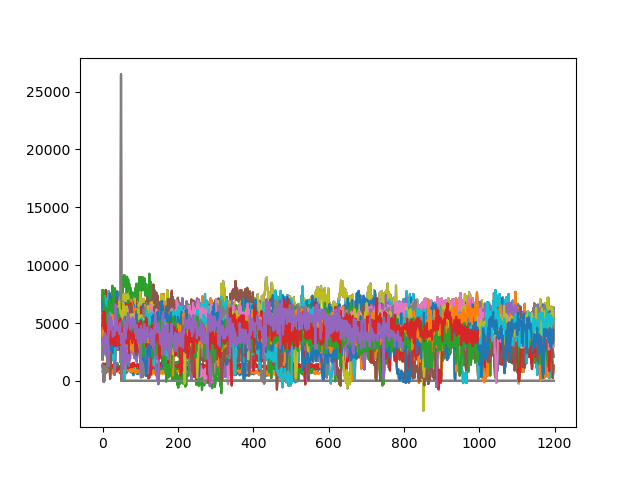

<IPython.core.display.Javascript object>


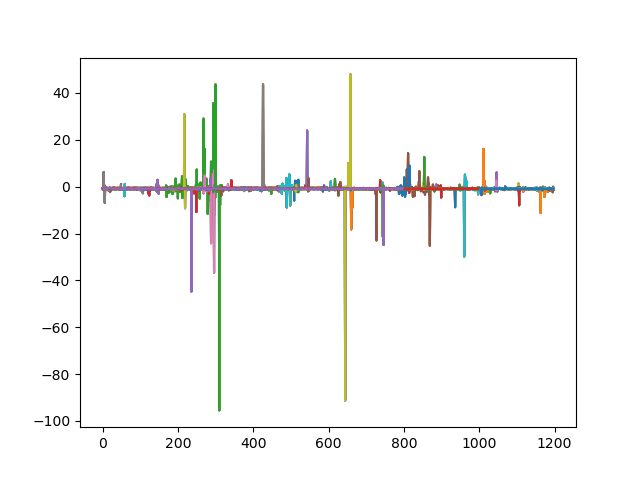

bin: 1
average signal size filtered 1106.9452554744526
average asymmetry filtered -0.4947986248699655
std of asymmetry filtered 0.0799462392025836
error of asymmetry filtered 0.006830268166838321
number of useful shots: 137


<IPython.core.display.Javascript object>


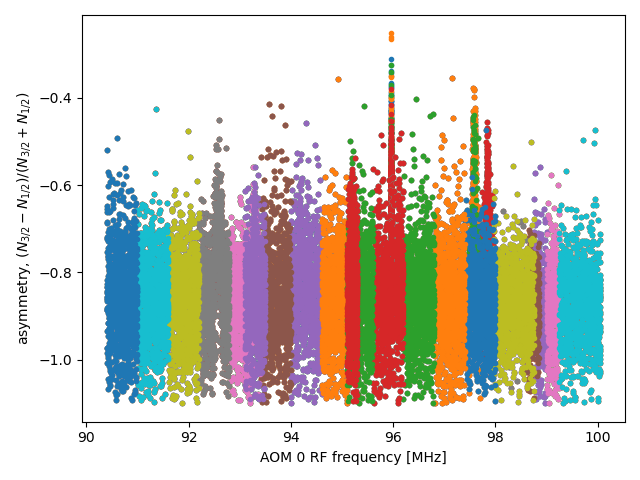

average scattering photons:  2449.7290969899664
bin: 1
average signal size 766.5451505016722
average asymmetry -0.497226411222918
std of asymmetry 0.1766303417115253
error of asymmetry 0.007222951806420737
bin: 1
average signal size filtered 1078.5425531914893
average asymmetry filtered -0.4768264570452673
std of asymmetry filtered 0.09327008413887668
error of asymmetry filtered 0.013604840029925156
number of useful shots: 47


<IPython.core.display.Javascript object>


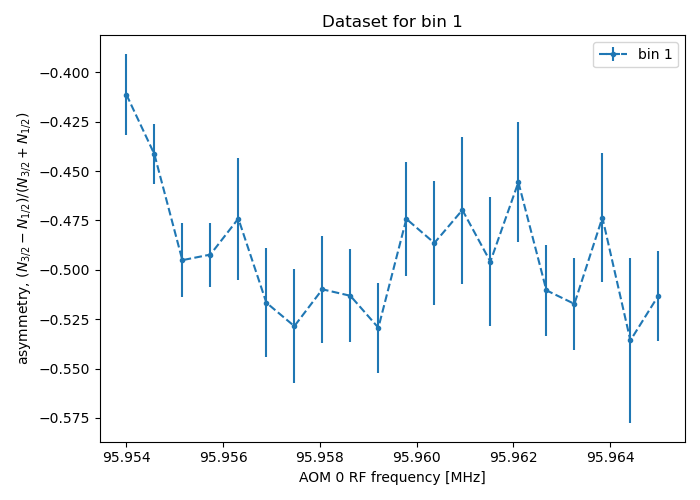

average scattering photons:  2443.1421404682274
bin: 2
average signal size 1261.826923076923
average asymmetry -0.6494817550723687
std of asymmetry 0.18537514391681756
error of asymmetry 0.0075805533615865344
bin: 2
average signal size filtered 1322.6195255474452
average asymmetry filtered -0.647396629273913
std of asymmetry filtered 0.08706482513809082
error of asymmetry filtered 0.003719225003724932
number of useful shots: 548
average scattering photons:  2449.7290969899664
bin: 2
average signal size 1250.1170568561872
average asymmetry -0.6509549678314063
std of asymmetry 0.09064018674922286
error of asymmetry 0.0037065528734800215
bin: 2
average signal size filtered 1269.9681978798587
average asymmetry filtered -0.6475461051289765
std of asymmetry filtered 0.0846958281501583
error of asymmetry filtered 0.003560031193048603
number of useful shots: 566


<IPython.core.display.Javascript object>


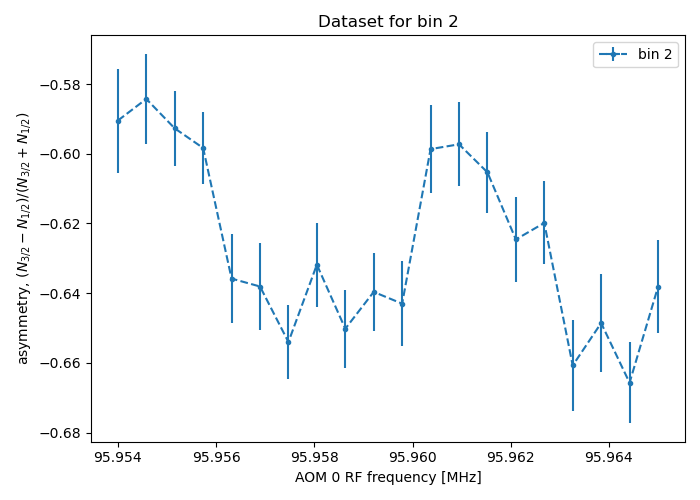


=== All datasets stored ===
Available datasets (bins): [1, 2]

Bin 1:
  - Number of frequency points: 20
  - Frequency range: 95.9540 - 95.9650 MHz
  - Asymmetry range: -0.5358 - -0.4112
  - Mean error: 0.026812

Bin 2:
  - Number of frequency points: 20
  - Frequency range: 95.9540 - 95.9650 MHz
  - Asymmetry range: -0.6657 - -0.5843
  - Mean error: 0.012208


In [9]:
#the code that does NOT assume photon counts limited by shot noise, correct one


both_signal_bin = False
#scan_numbers = [8,9,208,209,210,211]
#scan_numbers = [8,9,208]
#scan_numbers = [2,3,4,5,6,7]  # 20 V/cm data on 20250908
#scan_numbers = [8,9] # 20 V/cm Ramsey data on 20250908
#scan_numbers = [202,203,204,205,207]  # 10 V/cm data on 20250906
#scan_numbers = [18,19,20]  # 40 V/cm data on 20250917
#scan_numbers = [18,19,20,21]  # 40 V/cm data on 20250918
#scan_numbers = [1,2]  # 40 V/cm data on 20250919
#scan_numbers = [23,24] # 1ms field free Ramsey data on 20251007
#scan_numbers = [15,16] # 1ms field free Ramsey data on 20251009
#scan_numbers = [8,9] # short Ramsey data on 20251014
#scan_numbers = [102,103, 104] # long Ramsey data on 20251015
#scan_numbers = [2,3] # long Ramsey data on 20251022
#scan_numbers = [15,16] # long Ramsey data on 20251105
#scan_numbers = [2,3] # short Ramsey data on 20251117
#scan_numbers = [2,3] # short Ramsey data on 20251205
scan_numbers = [5,6] # short Ramsey data on 20251206


scattering_bins = [9,10]

import numpy as np
import matplotlib.pyplot as plt


#save_folder = '/home/harish/Hutzler Lab Dropbox/HutzlerLabShared/Personal/HarishRamachandran/data/'
save_folder = 'F:\\Hutzler Lab Dropbox\\HutzlerLabData\\Orange Beam Source\\PXI Data\\20251206\\'

# Dictionary to store results from each dataset (bin)
datasets = {}  # Will store: {bin_number: {'freq': array, 'asymmetry': array, 'error': array}}

freq_plot_filt_combined = []
asymmetry_filt_combined = []
for jiji in [1,2]:
    for scan_number in scan_numbers:

        data = np.load(save_folder+f'scan_{scan_number}.npz')
        a_counts = data['a_counts']
        b_counts = data['b_counts']
        frequencies_0 = data['frequencies_0']


        offset = 1
        signal_bin = jiji
        first_shot = 0
        last_shot = len(a_counts[0])-1

        print('average scattering photons: ', np.mean(np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1)))

        if both_signal_bin:
            a_diff = (a_counts[0,first_shot:last_shot-offset,0] + a_counts[0,first_shot:last_shot-offset,1] - 2*np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
            b_diff = (b_counts[0,first_shot:last_shot-offset,0] + b_counts[0,first_shot:last_shot-offset,1] - 2*np.mean(b_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
        else:
            a_diff = (a_counts[0,first_shot:last_shot-offset,signal_bin] - np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
            b_diff = (b_counts[0,first_shot:last_shot-offset,signal_bin] - np.mean(b_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
        freq_plot = frequencies_0[first_shot+offset:last_shot]
        sum_counts = a_diff + b_diff
        difference_counts = a_diff - b_diff

        asymmetry = difference_counts/sum_counts

        print('bin:', signal_bin)
        print('average signal size',np.mean(sum_counts))
        print('average asymmetry',np.mean(asymmetry))
        print('std of asymmetry',np.std(asymmetry))
        print('error of asymmetry',np.std(asymmetry)/np.sqrt(len(asymmetry)))

        plt.figure(10)
        plt.plot(sum_counts)
        plt.show()


        plt.figure(11)
        plt.plot(asymmetry)
        plt.show()


        filter_outliers = np.logical_and(np.logical_and(sum_counts > 1000, asymmetry < 1.1),
                                         np.logical_and(sum_counts < 900000, asymmetry > -1.1))
        a_diff_filt = a_diff[filter_outliers]
        b_diff_filt = b_diff[filter_outliers]
        freq_plot_filt = freq_plot[filter_outliers]

        sum_counts_filt = a_diff_filt + b_diff_filt
        difference_counts_filt = a_diff_filt - b_diff_filt

        asymmetry_filt = difference_counts_filt/sum_counts_filt

        print('bin:', signal_bin)
        print('average signal size filtered',np.mean(sum_counts_filt))
        print('average asymmetry filtered',np.mean(asymmetry_filt))
        print('std of asymmetry filtered',np.std(asymmetry_filt))
        print('error of asymmetry filtered',np.std(asymmetry_filt)/np.sqrt(len(asymmetry_filt)))



        num_useful_shots = len(freq_plot_filt)
        print('number of useful shots:',num_useful_shots)

        plt.figure(12)
        plt.plot(freq_plot_filt/1e6, asymmetry_filt, marker='.', linestyle='')
        plt.xlabel('AOM 0 RF frequency [MHz]')
        plt.ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$')
        #plt.text(101.52, -0.25, r'$N$ ='+f' {num_useful_shots}', horizontalalignment='right')
        plt.tight_layout()
        #plt.savefig('single_shot.pdf')
        plt.show()

        freq_plot_filt_combined.append(freq_plot_filt)
        asymmetry_filt_combined.append(asymmetry_filt)


    All_freq_plot_filt = np.concatenate(freq_plot_filt_combined)
    All_asymmetry_filt = np.concatenate(asymmetry_filt_combined)

    import numpy as np
    import matplotlib.pyplot as plt

    def average_and_error_at_frequency(freq_plot_filt, asymmetry_filt):
        """Averages asymmetry values and calculates the standard error for each unique frequency.

        Args:
            freq_plot_filt: 1D numpy array of frequencies.
            asymmetry_filt: 1D numpy array of asymmetry values (same size as freq_plot_filt).

        Returns:
            tuple: (unique_frequencies, averaged_asymmetries, errors)
                   where unique_frequencies is a sorted 1D numpy array of unique frequencies,
                   averaged_asymmetries is a 1D numpy array of corresponding averaged
                   asymmetry values, and errors is a 1D numpy array of the standard errors.
                   Returns empty arrays if input arrays are empty or of different sizes.
        """
        if not freq_plot_filt.size or not asymmetry_filt.size or freq_plot_filt.size != asymmetry_filt.size:
            return np.array([]), np.array([]), np.array([])

        unique_freqs = np.unique(freq_plot_filt)
        averaged_asymmetries = []
        errors = []

        for freq in unique_freqs:
            indices = np.where(freq_plot_filt == freq)[0]
            asymmetries_at_freq = asymmetry_filt[indices]
            average_asymmetry = np.mean(asymmetries_at_freq)
            std_dev = np.std(asymmetries_at_freq)
            num_points = len(asymmetries_at_freq)
            error = std_dev / np.sqrt(num_points) if num_points > 0 else 0 # Handle cases where num_points is 0 to avoid ZeroDivisionError
            averaged_asymmetries.append(average_asymmetry)
            errors.append(error)

        return unique_freqs, np.array(averaged_asymmetries), np.array(errors)


    unique_freqs, averaged_asymmetries, asymmetry_err = average_and_error_at_frequency(All_freq_plot_filt, All_asymmetry_filt)

    # Store results in datasets dictionary for this bin
    datasets[jiji] = {
        'freq': unique_freqs,
        'asymmetry': averaged_asymmetries,
        'error': asymmetry_err
    }

    # Plot this dataset
    plt.figure(figsize=(7, 5))
    plt.errorbar(unique_freqs/1e6, averaged_asymmetries, yerr=asymmetry_err, xerr=0, 
                 marker='.', linestyle='--', label=f'bin {jiji}')
    plt.xlabel('AOM 0 RF frequency [MHz]')
    plt.ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$')
    plt.title(f'Dataset for bin {jiji}')
    plt.tight_layout()
    plt.legend()
    plt.show()

print("\n=== All datasets stored ===")
print("Available datasets (bins):", list(datasets.keys()))
for bin_num, data in datasets.items():
    print(f"\nBin {bin_num}:")
    print(f"  - Number of frequency points: {len(data['freq'])}")
    print(f"  - Frequency range: {data['freq'].min()/1e6:.4f} - {data['freq'].max()/1e6:.4f} MHz")
    print(f"  - Asymmetry range: {data['asymmetry'].min():.4f} - {data['asymmetry'].max():.4f}")
    print(f"  - Mean error: {data['error'].mean():.6f}")


average scattering photons:  2443.1421404682274
bin: 1
average signal size 834.3921404682275
average asymmetry -0.48610348677777976
std of asymmetry 0.37209842662347364
error of asymmetry 0.01521623621798701
bin: 1
average signal size filtered 1106.9452554744526
average asymmetry filtered -0.4947986248699655
std of asymmetry filtered 0.0799462392025836
error of asymmetry filtered 0.006830268166838321
number of useful shots: 137
average scattering photons:  2449.7290969899664
bin: 1
average signal size 766.5451505016722
average asymmetry -0.497226411222918
std of asymmetry 0.1766303417115253
error of asymmetry 0.007222951806420737
bin: 1
average signal size filtered 1078.5425531914893
average asymmetry filtered -0.4768264570452673
std of asymmetry filtered 0.09327008413887668
error of asymmetry filtered 0.013604840029925156
number of useful shots: 47


<IPython.core.display.Javascript object>


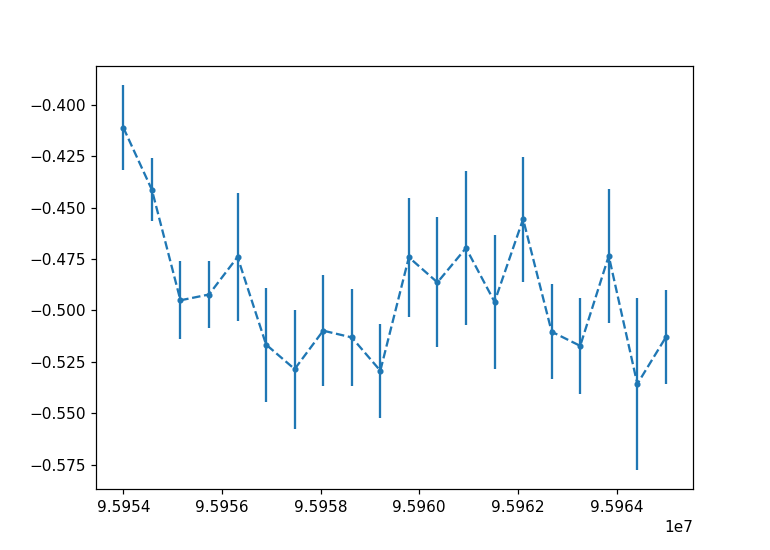

average scattering photons:  2443.1421404682274
bin: 2
average signal size 1261.826923076923
average asymmetry -0.6494817550723687
std of asymmetry 0.18537514391681756
error of asymmetry 0.0075805533615865344
bin: 2
average signal size filtered 1322.6195255474452
average asymmetry filtered -0.647396629273913
std of asymmetry filtered 0.08706482513809082
error of asymmetry filtered 0.003719225003724932
number of useful shots: 548
average scattering photons:  2449.7290969899664
bin: 2
average signal size 1250.1170568561872
average asymmetry -0.6509549678314063
std of asymmetry 0.09064018674922286
error of asymmetry 0.0037065528734800215
bin: 2
average signal size filtered 1269.9681978798587
average asymmetry filtered -0.6475461051289765
std of asymmetry filtered 0.0846958281501583
error of asymmetry filtered 0.003560031193048603
number of useful shots: 566


<IPython.core.display.Javascript object>


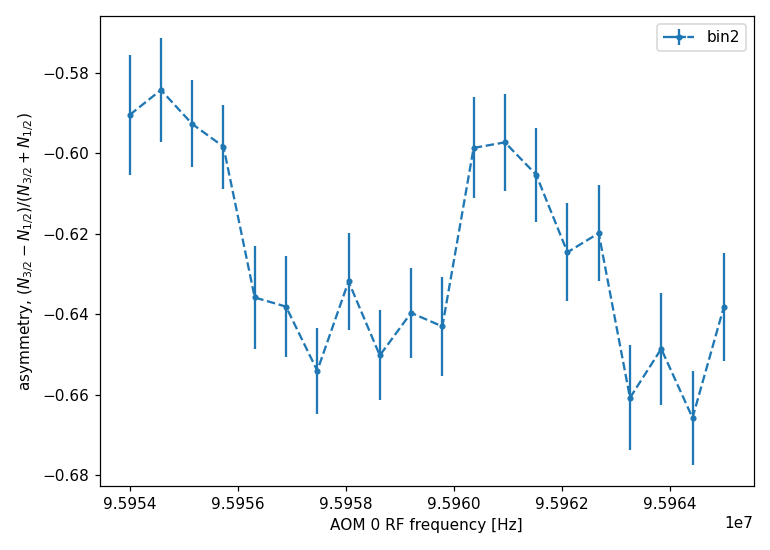

'\n\noutput_path_txt = "First_MQM_Ramsey.txt"\n\nwith open(output_path_txt, "w") as f:\n    for fval, aval, err in zip(2*unique_freqs+180000000, averaged_asymmetries, asymmetry_err):\n        f.write(f"{fval:.6f}\t{aval:.6f}\t{err:.6f}\n")\n'

In [76]:
#the code that does NOT assume photon counts limited by shot noise, correct one


both_signal_bin = False
#scan_numbers = [8,9,208,209,210,211]
#scan_numbers = [8,9,208]
#scan_numbers = [2,3,4,5,6,7]  # 20 V/cm data on 20250908
#scan_numbers = [8,9] # 20 V/cm Ramsey data on 20250908
#scan_numbers = [202,203,204,205,207]  # 10 V/cm data on 20250906
#scan_numbers = [18,19,20]  # 40 V/cm data on 20250917
#scan_numbers = [18,19,20,21]  # 40 V/cm data on 20250918
#scan_numbers = [1,2]  # 40 V/cm data on 20250919
#scan_numbers = [23,24] # 1ms field free Ramsey data on 20251007
#scan_numbers = [15,16] # 1ms field free Ramsey data on 20251009
#scan_numbers = [8,9] # short Ramsey data on 20251014
#scan_numbers = [102,103, 104] # long Ramsey data on 20251015
#scan_numbers = [2,3] # long Ramsey data on 20251022
#scan_numbers = [15,16] # long Ramsey data on 20251105
#scan_numbers = [2,3] # short Ramsey data on 20251117
#scan_numbers = [2,3] # short Ramsey data on 20251205
scan_numbers = [5,6] # short Ramsey data on 20251206


scattering_bins = [9,10]

import numpy as np
import matplotlib.pyplot as plt


#save_folder = '/home/harish/Hutzler Lab Dropbox/HutzlerLabShared/Personal/HarishRamachandran/data/'
save_folder = 'F:\\Hutzler Lab Dropbox\\HutzlerLabData\\Orange Beam Source\\PXI Data\\20251206\\'

freq_plot_filt_combined = []
asymmetry_filt_combined = []
for jiji in [1,2]:
    for scan_number in scan_numbers:

        data = np.load(save_folder+f'scan_{scan_number}.npz')
        a_counts = data['a_counts']
        b_counts = data['b_counts']
        frequencies_0 = data['frequencies_0']


        offset = 1
        signal_bin = jiji
        first_shot = 0
        last_shot = len(a_counts[0])-1

        print('average scattering photons: ', np.mean(np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1)))

        if both_signal_bin:
            a_diff = (a_counts[0,first_shot:last_shot-offset,0] + a_counts[0,first_shot:last_shot-offset,1] - 2*np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
            b_diff = (b_counts[0,first_shot:last_shot-offset,0] + b_counts[0,first_shot:last_shot-offset,1] - 2*np.mean(b_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
        else:
            a_diff = (a_counts[0,first_shot:last_shot-offset,signal_bin] - np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
            b_diff = (b_counts[0,first_shot:last_shot-offset,signal_bin] - np.mean(b_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
        freq_plot = frequencies_0[first_shot+offset:last_shot]
        sum_counts = a_diff + b_diff
        difference_counts = a_diff - b_diff

        asymmetry = difference_counts/sum_counts

        print('bin:', signal_bin)
        print('average signal size',np.mean(sum_counts))
        print('average asymmetry',np.mean(asymmetry))
        print('std of asymmetry',np.std(asymmetry))
        print('error of asymmetry',np.std(asymmetry)/np.sqrt(len(asymmetry)))

        plt.figure(10)
        plt.plot(sum_counts)
        plt.show()


        plt.figure(11)
        plt.plot(asymmetry)
        plt.show()


        filter_outliers = np.logical_and(np.logical_and(sum_counts > 1000, asymmetry < 1.1),
                                         np.logical_and(sum_counts < 900000, asymmetry > -1.1))
        a_diff_filt = a_diff[filter_outliers]
        b_diff_filt = b_diff[filter_outliers]
        freq_plot_filt = freq_plot[filter_outliers]

        sum_counts_filt = a_diff_filt + b_diff_filt
        difference_counts_filt = a_diff_filt - b_diff_filt

        asymmetry_filt = difference_counts_filt/sum_counts_filt

        print('bin:', signal_bin)
        print('average signal size filtered',np.mean(sum_counts_filt))
        print('average asymmetry filtered',np.mean(asymmetry_filt))
        print('std of asymmetry filtered',np.std(asymmetry_filt))
        print('error of asymmetry filtered',np.std(asymmetry_filt)/np.sqrt(len(asymmetry_filt)))



        num_useful_shots = len(freq_plot_filt)
        print('number of useful shots:',num_useful_shots)

        plt.figure(12)
        plt.plot(freq_plot_filt/1e6, asymmetry_filt, marker='.', linestyle='')
        plt.xlabel('AOM 0 RF frequency [MHz]')
        plt.ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$')
        #plt.text(101.52, -0.25, r'$N$ ='+f' {num_useful_shots}', horizontalalignment='right')
        plt.tight_layout()
        #plt.savefig('single_shot.pdf')
        plt.show()

        freq_plot_filt_combined.append(freq_plot_filt)
        asymmetry_filt_combined.append(asymmetry_filt)


    All_freq_plot_filt = np.concatenate(freq_plot_filt_combined)
    All_asymmetry_filt = np.concatenate(asymmetry_filt_combined)

    import numpy as np
    import matplotlib.pyplot as plt

    def average_and_error_at_frequency(freq_plot_filt, asymmetry_filt):
        """Averages asymmetry values and calculates the standard error for each unique frequency.

        Args:
            freq_plot_filt: 1D numpy array of frequencies.
            asymmetry_filt: 1D numpy array of asymmetry values (same size as freq_plot_filt).

        Returns:
            tuple: (unique_frequencies, averaged_asymmetries, errors)
                   where unique_frequencies is a sorted 1D numpy array of unique frequencies,
                   averaged_asymmetries is a 1D numpy array of corresponding averaged
                   asymmetry values, and errors is a 1D numpy array of the standard errors.
                   Returns empty arrays if input arrays are empty or of different sizes.
        """
        if not freq_plot_filt.size or not asymmetry_filt.size or freq_plot_filt.size != asymmetry_filt.size:
            return np.array([]), np.array([]), np.array([])

        unique_freqs = np.unique(freq_plot_filt)
        averaged_asymmetries = []
        errors = []

        for freq in unique_freqs:
            indices = np.where(freq_plot_filt == freq)[0]
            asymmetries_at_freq = asymmetry_filt[indices]
            average_asymmetry = np.mean(asymmetries_at_freq)
            std_dev = np.std(asymmetries_at_freq)
            num_points = len(asymmetries_at_freq)
            error = std_dev / np.sqrt(num_points) if num_points > 0 else 0 # Handle cases where num_points is 0 to avoid ZeroDivisionError
            averaged_asymmetries.append(average_asymmetry)
            errors.append(error)

        return unique_freqs, np.array(averaged_asymmetries), np.array(errors)


    unique_freqs, averaged_asymmetries, asymmetry_err = average_and_error_at_frequency(All_freq_plot_filt, All_asymmetry_filt)

    plt.figure(figsize = (7,5))
    plt.errorbar(unique_freqs, averaged_asymmetries,yerr=asymmetry_err, xerr=0, marker='.', linestyle='--', label = 'bin'+str(jiji))
#plt.figure(11233)
plt.xlabel('AOM 0 RF frequency [Hz]')
plt.ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$')
plt.tight_layout()
plt.legend()
#plt.xlim(97.5e6, 97.75e6)
plt.show()



'''

output_path_txt = "First_MQM_Ramsey.txt"

with open(output_path_txt, "w") as f:
    for fval, aval, err in zip(2*unique_freqs+180000000, averaged_asymmetries, asymmetry_err):
        f.write(f"{fval:.6f}\t{aval:.6f}\t{err:.6f}\n")
'''

In [98]:
freq_10 = unique_freqs/1000000
asym_10 = averaged_asymmetries
asym_err_10 = asymmetry_err

In [101]:
freq_20 = unique_freqs/1000000
asym_20 = averaged_asymmetries
asym_err_20 = asymmetry_err

50


<IPython.core.display.Javascript object>


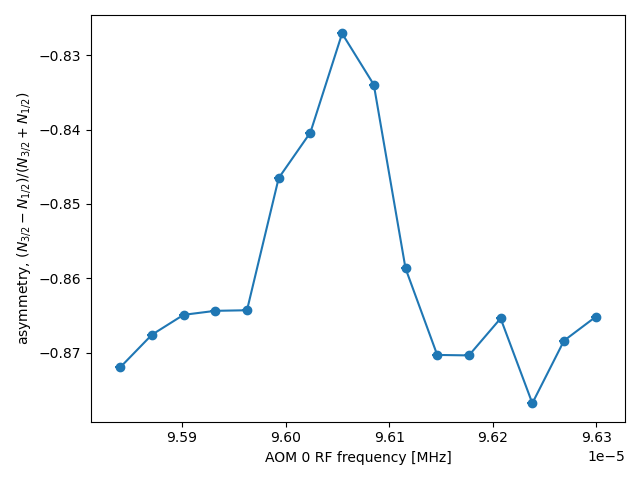

In [100]:
print(len(All_freq_plot_filt))
All_freq_plot_filt=unique_freqs/1000000
All_asymmetry_filt=averaged_asymmetries

averaging_factor = 3
num_averaged_points = len(All_freq_plot_filt) // averaging_factor


sort_indices = np.argsort(All_freq_plot_filt)
freq_sort = All_freq_plot_filt[sort_indices]
asymmetry_sort = All_asymmetry_filt[sort_indices]


freq_avg = np.mean(np.reshape(freq_sort[0:averaging_factor*num_averaged_points], (num_averaged_points, averaging_factor)), axis=1)
freq_err = np.std(np.reshape(freq_sort[0:averaging_factor*num_averaged_points], (num_averaged_points, averaging_factor)), axis=1)/np.sqrt(averaging_factor)
asymmetry_avg = np.mean(np.reshape(asymmetry_sort[0:averaging_factor*num_averaged_points], (num_averaged_points, averaging_factor)), axis=1)
asymmetry_err = np.std(np.reshape(asymmetry_sort[0:averaging_factor*num_averaged_points], (num_averaged_points, averaging_factor)), axis=1)/np.sqrt(averaging_factor)

signal = np.max(asymmetry_avg) - np.min(asymmetry_avg)
noise = asymmetry_err[np.argmin(asymmetry_avg)]
SNR = signal/noise
SNR_single_shot = SNR / np.sqrt(averaging_factor)

scattering_average = np.mean(a_counts[0,first_shot:last_shot,1]+b_counts[0,first_shot:last_shot,1])
peak_signal_counts = signal * np.mean(sum_counts_filt)
max_SNR = peak_signal_counts / np.sqrt(2*scattering_average + peak_signal_counts)

plt.figure(-1234910458230958)
plt.errorbar(freq_avg/1e6, asymmetry_avg,yerr=0*asymmetry_err, xerr=freq_err/1e6, marker='o', linestyle='-')
plt.xlabel('AOM 0 RF frequency [MHz]')
plt.ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$')
plt.tight_layout()
plt.show()


C:\Users\main\AppData\Local\Temp\ipykernel_16960\3442799242.py:57: RuntimeWarning: invalid value encountered in divide
  asymmetry = difference_counts/sum_counts


[     8      9    208    209    210    211 100010 100011 100012]
average scattering photons:  22508.88955823293
bin: 0
average signal size 5427.467871485944
average asymmetry -0.7348287805317799
std of asymmetry 0.14230801302025606
error of asymmetry 0.006376974545736766
bin: 0
average signal size filtered 5435.420523138833
average asymmetry filtered -0.7347481236430364
std of asymmetry filtered 0.14243973617249797
error of asymmetry filtered 0.006389295380126724
number of useful shots: 497
average scattering photons:  14050.116465863453
bin: 0
average signal size 2540.9738955823295
average asymmetry nan
std of asymmetry nan
error of asymmetry nan
bin: 0
average signal size filtered 7085.046783625731
average asymmetry filtered -0.7243436469906589
std of asymmetry filtered 0.12884841273590758
error of asymmetry filtered 0.009853284388621758
number of useful shots: 171
average scattering photons:  21320.777108433736
bin: 0
average signal size 5285.156626506024
average asymmetry -0.773696

<IPython.core.display.Javascript object>


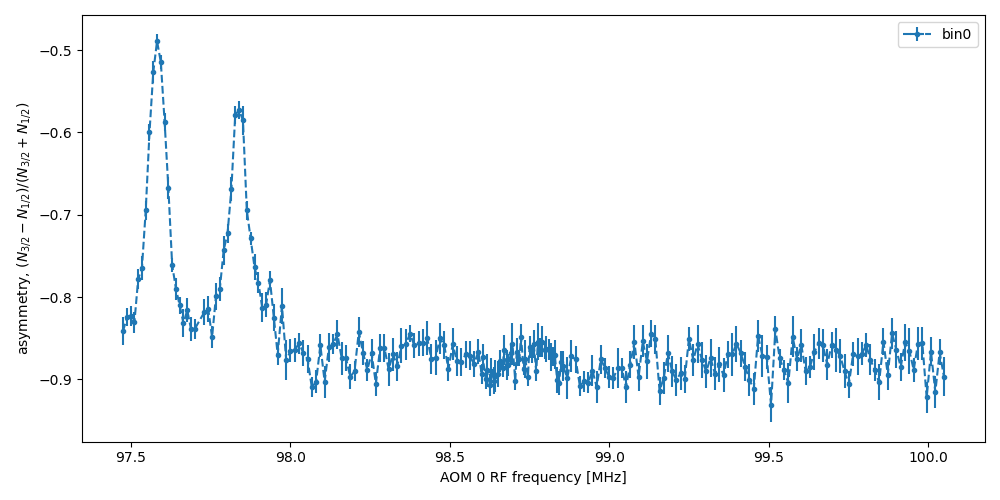

In [59]:
#the code that does NOT assume photon counts limited by shot noise, correct one


both_signal_bin = True
#scan_numbers = [8,9,208]
#scan_numbers = [2,3,4,5,6,7]
#scan_numbers = [8,9]
#scan_numbers = [202,203,204,205,207]
scan_numbers_1 = [8,9,208,209,210,211]
scan_numbers_2 = [10,11,12]
scan_numbers = np.concatenate((
    np.asarray(scan_numbers_1, dtype=int),
    100000 + np.asarray(scan_numbers_2, dtype=int)
))
print(scan_numbers)

scattering_bins = [1]

import numpy as np
import matplotlib.pyplot as plt


#save_folder = '/home/harish/Hutzler Lab Dropbox/HutzlerLabShared/Personal/HarishRamachandran/data/'
save_folder_1 = 'F:\\Hutzler Lab Dropbox\\HutzlerLabData\\Orange Beam Source\\PXI Data\\20250906\\'
save_folder_2 = 'F:\\Hutzler Lab Dropbox\\HutzlerLabData\\Orange Beam Source\\PXI Data\\20250908\\'

freq_plot_filt_combined = []
asymmetry_filt_combined = []
for jiji in [0]:
    for scan_number in scan_numbers:
        if scan_number < 10000:
            data = np.load(save_folder_1+f'scan_{scan_number}.npz')
        elif scan_number > 10000:
            data = np.load(save_folder_2+f'scan_{scan_number-100000}.npz')
        a_counts = data['a_counts']
        b_counts = data['b_counts']
        frequencies_0 = data['frequencies_0']


        offset = 1
        signal_bin = jiji
        first_shot = 0
        last_shot = len(a_counts[0])-1

        print('average scattering photons: ', np.mean(np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1)))

        if both_signal_bin:
            a_diff = (a_counts[0,first_shot:last_shot-offset,0] + a_counts[0,first_shot:last_shot-offset,1] - 2*np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
            b_diff = (b_counts[0,first_shot:last_shot-offset,0] + b_counts[0,first_shot:last_shot-offset,1] - 2*np.mean(b_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
        else:
            a_diff = (a_counts[0,first_shot:last_shot-offset,signal_bin] - np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
            b_diff = (b_counts[0,first_shot:last_shot-offset,signal_bin] - np.mean(b_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
        freq_plot = frequencies_0[first_shot+offset:last_shot]
        sum_counts = a_diff + b_diff
        difference_counts = a_diff - b_diff

        asymmetry = difference_counts/sum_counts

        print('bin:', signal_bin)
        print('average signal size',np.mean(sum_counts))
        print('average asymmetry',np.mean(asymmetry))
        print('std of asymmetry',np.std(asymmetry))
        print('error of asymmetry',np.std(asymmetry)/np.sqrt(len(asymmetry)))

        plt.figure(10)
        plt.plot(sum_counts)
        plt.show()


        plt.figure(11)
        plt.plot(asymmetry)
        plt.show()


        filter_outliers = np.logical_and(np.logical_and(sum_counts > 2000, asymmetry < -0.3),
                                         np.logical_and(sum_counts < 900000, asymmetry > -1.1))
        a_diff_filt = a_diff[filter_outliers]
        b_diff_filt = b_diff[filter_outliers]
        freq_plot_filt = freq_plot[filter_outliers]

        sum_counts_filt = a_diff_filt + b_diff_filt
        difference_counts_filt = a_diff_filt - b_diff_filt

        asymmetry_filt = difference_counts_filt/sum_counts_filt

        print('bin:', signal_bin)
        print('average signal size filtered',np.mean(sum_counts_filt))
        print('average asymmetry filtered',np.mean(asymmetry_filt))
        print('std of asymmetry filtered',np.std(asymmetry_filt))
        print('error of asymmetry filtered',np.std(asymmetry_filt)/np.sqrt(len(asymmetry_filt)))



        num_useful_shots = len(freq_plot_filt)
        print('number of useful shots:',num_useful_shots)

        plt.figure(12)
        plt.plot(freq_plot_filt/1e6, asymmetry_filt, marker='.', linestyle='')
        plt.xlabel('AOM 0 RF frequency [MHz]')
        plt.ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$')
        #plt.text(101.52, -0.25, r'$N$ ='+f' {num_useful_shots}', horizontalalignment='right')
        plt.tight_layout()
        #plt.savefig('single_shot.pdf')
        plt.show()

        freq_plot_filt_combined.append(freq_plot_filt)
        asymmetry_filt_combined.append(asymmetry_filt)


    All_freq_plot_filt = np.concatenate(freq_plot_filt_combined)
    All_asymmetry_filt = np.concatenate(asymmetry_filt_combined)

    import numpy as np
    import matplotlib.pyplot as plt

    def average_and_error_at_frequency(freq_plot_filt, asymmetry_filt):
        """Averages asymmetry values and calculates the standard error for each unique frequency.

        Args:
            freq_plot_filt: 1D numpy array of frequencies.
            asymmetry_filt: 1D numpy array of asymmetry values (same size as freq_plot_filt).

        Returns:
            tuple: (unique_frequencies, averaged_asymmetries, errors)
                   where unique_frequencies is a sorted 1D numpy array of unique frequencies,
                   averaged_asymmetries is a 1D numpy array of corresponding averaged
                   asymmetry values, and errors is a 1D numpy array of the standard errors.
                   Returns empty arrays if input arrays are empty or of different sizes.
        """
        if not freq_plot_filt.size or not asymmetry_filt.size or freq_plot_filt.size != asymmetry_filt.size:
            return np.array([]), np.array([]), np.array([])

        unique_freqs = np.unique(freq_plot_filt)
        averaged_asymmetries = []
        errors = []

        for freq in unique_freqs:
            indices = np.where(freq_plot_filt == freq)[0]
            asymmetries_at_freq = asymmetry_filt[indices]
            average_asymmetry = np.mean(asymmetries_at_freq)
            std_dev = np.std(asymmetries_at_freq)
            num_points = len(asymmetries_at_freq)
            error = std_dev / np.sqrt(num_points) if num_points > 0 else 0 # Handle cases where num_points is 0 to avoid ZeroDivisionError
            averaged_asymmetries.append(average_asymmetry)
            errors.append(error)

        return unique_freqs, np.array(averaged_asymmetries), np.array(errors)


    unique_freqs, averaged_asymmetries, asymmetry_err = average_and_error_at_frequency(All_freq_plot_filt, All_asymmetry_filt)

    plt.figure(figsize = (10,5))
    plt.errorbar(unique_freqs/1000000, averaged_asymmetries,yerr=asymmetry_err, xerr=0, marker='.', linestyle='--', label = 'bin'+str(jiji))
#plt.figure(11233)
plt.xlabel('AOM 0 RF frequency [MHz]')
plt.ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$')
plt.tight_layout()
plt.legend()
#plt.xlim(97.5e6, 97.75e6)
plt.show()


freq_00 = unique_freqs
asym_00 = averaged_asymmetries
asym_err_00 = asymmetry_err

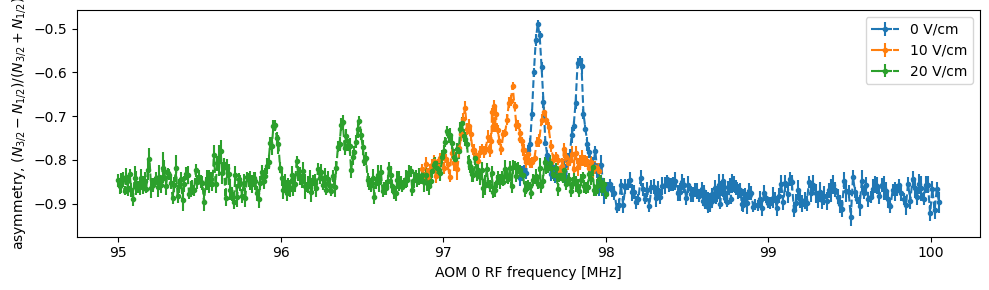

In [108]:
plt.figure(figsize=(10,3))
plt.errorbar(freq_0, asym_0,yerr=asym_err_0, xerr=0, marker='.', linestyle='--', label = '0 V/cm')
plt.errorbar(freq_10, asym_10,yerr=asym_err_10, xerr=0, marker='.', linestyle='--', label = '10 V/cm')
plt.errorbar(freq_20, asym_20,yerr=asym_err_20, xerr=0, marker='.', linestyle='--', label = '20 V/cm')

plt.xlabel('AOM 0 RF frequency [MHz]')
plt.ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$')
plt.tight_layout()
plt.legend()
#plt.xlim(97.5e6, 97.75e6)
plt.show()


Processing 10 V/cm data
Loaded scan_202 from 10 V/cm data
  Useful shots: 498, Avg asymmetry: -0.7741
Loaded scan_203 from 10 V/cm data
  Useful shots: 498, Avg asymmetry: -0.7229
Loaded scan_204 from 10 V/cm data
  Useful shots: 491, Avg asymmetry: -0.7539
Loaded scan_205 from 10 V/cm data
  Useful shots: 493, Avg asymmetry: -0.8115
Loaded scan_207 from 10 V/cm data
  Useful shots: 466, Avg asymmetry: -0.8036

Combined 10 V/cm:
  Total frequency points: 99
  Frequency range: 96.8700 - 97.9600 MHz
  Asymmetry range: -0.8395 - -0.6308
  Mean error: 0.013659

Processing 20 V/cm data
Loaded scan_2 from 20 V/cm data
  Useful shots: 1459, Avg asymmetry: -0.8167
Loaded scan_3 from 20 V/cm data
  Useful shots: 1483, Avg asymmetry: -0.8434
Loaded scan_4 from 20 V/cm data
  Useful shots: 905, Avg asymmetry: -0.8238
Loaded scan_5 from 20 V/cm data
  Useful shots: 886, Avg asymmetry: -0.8374
Loaded scan_6 from 20 V/cm data
  Useful shots: 45, Avg asymmetry: -0.8761
Loaded scan_7 from 20 V/cm dat

C:\Users\main\AppData\Local\Temp\ipykernel_16960\2376702673.py:121: RuntimeWarning: invalid value encountered in divide
  asymmetry = difference_counts / sum_counts


<IPython.core.display.Javascript object>


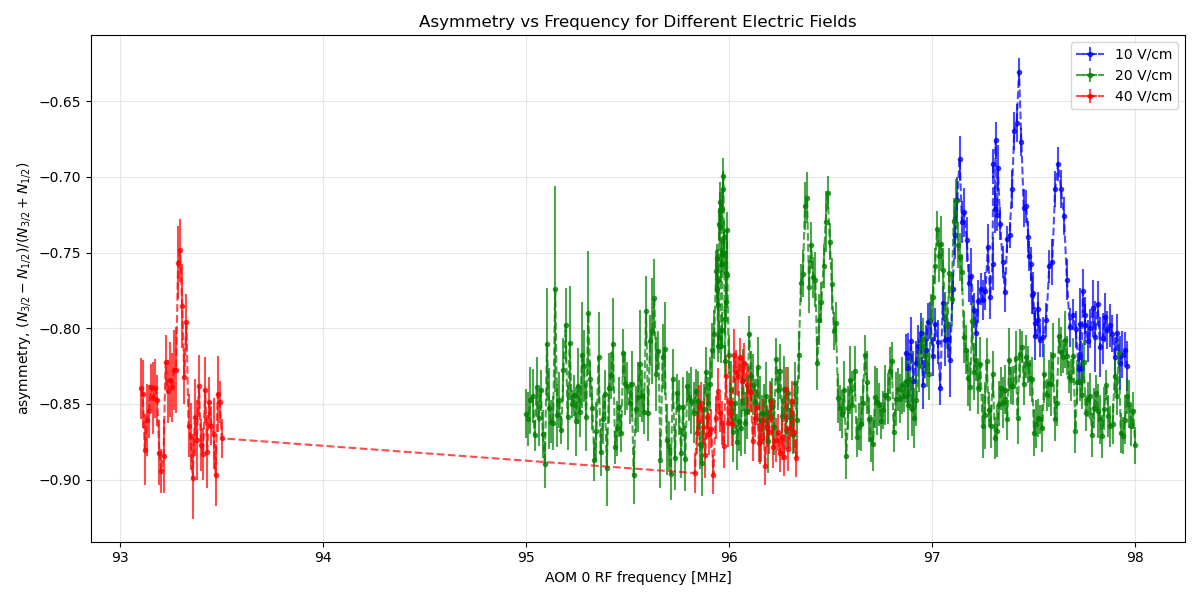


All datasets combined and stored in 'combined_data' dictionary
Keys available: ['10', '20', '40']


In [60]:
#the code that does NOT assume photon counts limited by shot noise, correct one

# Define all datasets organized by electric field (V/cm)
datasets_by_field = {
    '10': {
        'scan_numbers': [202, 203, 204, 205, 207],
        'date': '20250906',
        'folder': 'F:\\Hutzler Lab Dropbox\\HutzlerLabData\\Orange Beam Source\\PXI Data\\20250906\\'
    },
    '20': {
        'scan_numbers': [2, 3, 4, 5, 6, 7, 8, 9],  # Combined from both 20250908 datasets
        'date': '20250908',
        'folder': 'F:\\Hutzler Lab Dropbox\\HutzlerLabData\\Orange Beam Source\\PXI Data\\20250908\\'
    },
    '40': {
        'scan_numbers': [18, 19, 20, 21, 1, 2],  # Combined from all three dates
        'dates': ['20250917', '20250918', '20250919'],
        'folders': [
            'F:\\Hutzler Lab Dropbox\\HutzlerLabData\\Orange Beam Source\\PXI Data\\20250917\\',
            'F:\\Hutzler Lab Dropbox\\HutzlerLabData\\Orange Beam Source\\PXI Data\\20250918\\',
            'F:\\Hutzler Lab Dropbox\\HutzlerLabData\\Orange Beam Source\\PXI Data\\20250919\\'
        ]
    }
}

both_signal_bin = True
scattering_bins = [1]

import numpy as np
import matplotlib.pyplot as plt

def average_and_error_at_frequency(freq_plot_filt, asymmetry_filt):
    """Averages asymmetry values and calculates the standard error for each unique frequency.

    Args:
        freq_plot_filt: 1D numpy array of frequencies.
        asymmetry_filt: 1D numpy array of asymmetry values (same size as freq_plot_filt).

    Returns:
        tuple: (unique_frequencies, averaged_asymmetries, errors)
               where unique_frequencies is a sorted 1D numpy array of unique frequencies,
               averaged_asymmetries is a 1D numpy array of corresponding averaged
               asymmetry values, and errors is a 1D numpy array of the standard errors.
               Returns empty arrays if input arrays are empty or of different sizes.
    """
    if not freq_plot_filt.size or not asymmetry_filt.size or freq_plot_filt.size != asymmetry_filt.size:
        return np.array([]), np.array([]), np.array([])

    unique_freqs = np.unique(freq_plot_filt)
    averaged_asymmetries = []
    errors = []

    for freq in unique_freqs:
        indices = np.where(freq_plot_filt == freq)[0]
        asymmetries_at_freq = asymmetry_filt[indices]
        average_asymmetry = np.mean(asymmetries_at_freq)
        std_dev = np.std(asymmetries_at_freq)
        num_points = len(asymmetries_at_freq)
        error = std_dev / np.sqrt(num_points) if num_points > 0 else 0
        averaged_asymmetries.append(average_asymmetry)
        errors.append(error)

    return unique_freqs, np.array(averaged_asymmetries), np.array(errors)

# Dictionary to store combined results by electric field
combined_data = {}

# Process each electric field
for field_str, field_info in datasets_by_field.items():
    print(f"\n{'='*60}")
    print(f"Processing {field_str} V/cm data")
    print(f"{'='*60}")
    
    freq_plot_filt_combined = []
    asymmetry_filt_combined = []
    
    scan_numbers = field_info['scan_numbers']
    
    # Determine folder mapping for 40 V/cm (multiple dates)
    if field_str == '40':
        # Map scan numbers to their respective folders
        folder_map = {
            18: 0, 19: 0, 20: 0,  # 20250917
            21: 1,                  # 20250918
            1: 2, 2: 2              # 20250919
        }
        folders = field_info['folders']
    else:
        # Single folder for 10 and 20 V/cm
        folder = field_info['folder']
    
    for scan_number in scan_numbers:
        # Determine which folder to use
        if field_str == '40':
            folder = folders[folder_map[scan_number]]
        
        try:
            data = np.load(folder + f'scan_{scan_number}.npz')
            print(f"Loaded scan_{scan_number} from {field_str} V/cm data")
        except FileNotFoundError:
            print(f"Warning: scan_{scan_number} not found in {folder}")
            continue
        
        a_counts = data['a_counts']
        b_counts = data['b_counts']
        frequencies_0 = data['frequencies_0']
        
        offset = 1
        first_shot = 0
        last_shot = len(a_counts[0]) - 1
        
        if both_signal_bin:
            a_diff = (a_counts[0, first_shot:last_shot-offset, 0] + a_counts[0, first_shot:last_shot-offset, 1] 
                     - 2*np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
            b_diff = (b_counts[0, first_shot:last_shot-offset, 0] + b_counts[0, first_shot:last_shot-offset, 1] 
                     - 2*np.mean(b_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
        
        freq_plot = frequencies_0[first_shot+offset:last_shot]
        sum_counts = a_diff + b_diff
        difference_counts = a_diff - b_diff
        asymmetry = difference_counts / sum_counts
        
        # Apply outlier filter
        filter_outliers = np.logical_and(
            np.logical_and(sum_counts > 1000, sum_counts < 900000),
            np.logical_and(asymmetry > -1.1, asymmetry < 1.1)
        )
        
        a_diff_filt = a_diff[filter_outliers]
        b_diff_filt = b_diff[filter_outliers]
        freq_plot_filt = freq_plot[filter_outliers]
        sum_counts_filt = a_diff_filt + b_diff_filt
        difference_counts_filt = a_diff_filt - b_diff_filt
        asymmetry_filt = difference_counts_filt / sum_counts_filt
        
        num_useful_shots = len(freq_plot_filt)
        print(f"  Useful shots: {num_useful_shots}, Avg asymmetry: {np.mean(asymmetry_filt):.4f}")
        
        freq_plot_filt_combined.append(freq_plot_filt)
        asymmetry_filt_combined.append(asymmetry_filt)
    
    # Combine all scans for this field
    All_freq_plot_filt = np.concatenate(freq_plot_filt_combined)
    All_asymmetry_filt = np.concatenate(asymmetry_filt_combined)
    
    # Average at each unique frequency
    unique_freqs, averaged_asymmetries, asymmetry_err = average_and_error_at_frequency(
        All_freq_plot_filt, All_asymmetry_filt
    )
    
    # Store in combined data dictionary
    combined_data[field_str] = {
        'freq': unique_freqs,
        'asymmetry': averaged_asymmetries,
        'error': asymmetry_err
    }
    
    print(f"\nCombined {field_str} V/cm:")
    print(f"  Total frequency points: {len(unique_freqs)}")
    print(f"  Frequency range: {unique_freqs.min()/1e6:.4f} - {unique_freqs.max()/1e6:.4f} MHz")
    print(f"  Asymmetry range: {averaged_asymmetries.min():.4f} - {averaged_asymmetries.max():.4f}")
    print(f"  Mean error: {asymmetry_err.mean():.6f}")

# Plot all electric fields together for comparison
plt.figure(figsize=(12, 6))
colors = {'10': 'blue', '20': 'green', '40': 'red'}

for field_str in ['10', '20', '40']:
    data = combined_data[field_str]
    plt.errorbar(data['freq']/1e6, data['asymmetry'], yerr=data['error'], 
                xerr=0, marker='.', linestyle='--', label=f'{field_str} V/cm', 
                color=colors[field_str], alpha=0.7)
    if field_str in ['10']:
        freq_10 = data['freq']/1e6
        asym_10 = data['asymmetry']
        asym_err_10 = yerr=data['error']
    if field_str in ['20']:
        freq_20 = data['freq']/1e6
        asym_20 = data['asymmetry']
        asym_err_20 = yerr=data['error']

plt.xlabel('AOM 0 RF frequency [MHz]')
plt.ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$')
plt.title('Asymmetry vs Frequency for Different Electric Fields')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("All datasets combined and stored in 'combined_data' dictionary")
print("Keys available:", list(combined_data.keys()))
print("="*60)


{'10': {'freq': array([96870000, 96882105, 96894210, 96906315, 96918421, 96930526,
         96942631, 96954736, 96966842, 96978947, 96991052, 97003157,
         97015263, 97027368, 97039473, 97051578, 97063684, 97075789,
         97087894, 97100000, 97111578, 97123157, 97134736, 97146315,
         97157894, 97169473, 97181052, 97192631, 97204210, 97215789,
         97227368, 97238947, 97250526, 97262105, 97273684, 97285263,
         97296842, 97300000, 97308421, 97311578, 97320000, 97323157,
         97334736, 97346315, 97357894, 97369473, 97381052, 97392631,
         97404210, 97415789, 97427368, 97438947, 97450526, 97462105,
         97473684, 97475000, 97485263, 97489473, 97496842, 97503947,
         97508421, 97518421, 97520000, 97532894, 97547368, 97561842,
         97576315, 97590789, 97605263, 97619736, 97634210, 97648684,
         97663157, 97677631, 97692105, 97706578, 97721052, 97730000,
         97735526, 97742105, 97750000, 97754210, 97766315, 97778421,
         97790526, 9

[     1      2      3      5      6      7      8      9     10     11
     12 100018 100019 100020 100021]
average scattering photons:  26192.49165275459
bin: 0
average signal size 4989.58347245409
average asymmetry -0.8843210610017942
std of asymmetry 0.43639639412839054
error of asymmetry 0.012608189987655881
bin: 0
average signal size filtered 5236.86541889483
average asymmetry filtered -0.8695867679682768
std of asymmetry filtered 0.08432749606938365
error of asymmetry filtered 0.0025175191140487173
number of useful shots: 1122
average scattering photons:  26332.404006677796
bin: 0
average signal size 4047.5876460767945
average asymmetry -0.8929376856412803
std of asymmetry 0.8393167981475724
error of asymmetry 0.024249205065068082
bin: 0
average signal size filtered 4332.413793103448
average asymmetry filtered -0.8592269861637265
std of asymmetry filtered 0.10411650965400134
error of asymmetry filtered 0.003178481877882249
number of useful shots: 1073
average scattering photons: 

<IPython.core.display.Javascript object>


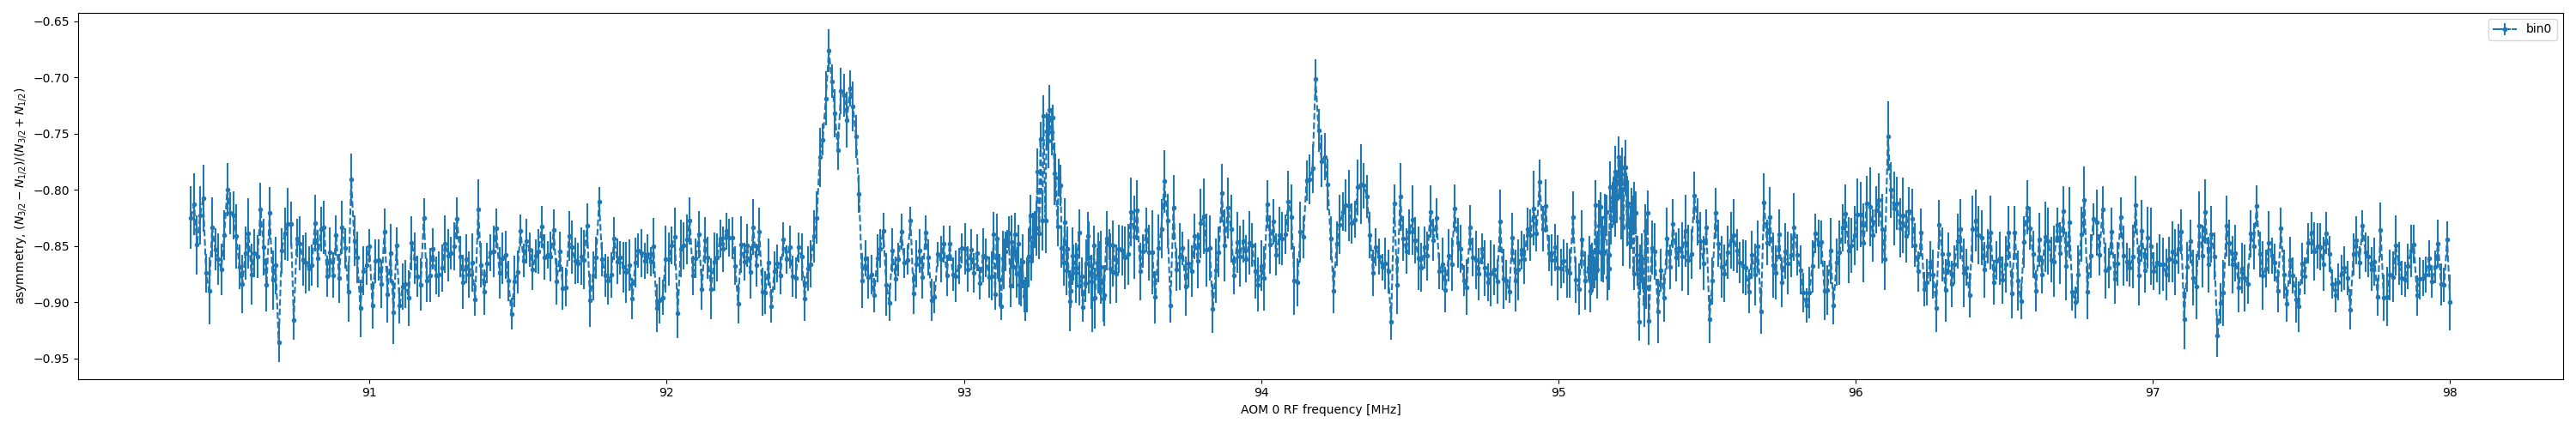

In [61]:
#the code that does NOT assume photon counts limited by shot noise, correct one


both_signal_bin = True

scan_numbers_1 = [1,2,3,5,6,7,8,9,10,11,12]
scan_numbers_2 = [18,19,20,21]
scan_numbers = np.concatenate((
    np.asarray(scan_numbers_1, dtype=int),
    100000 + np.asarray(scan_numbers_2, dtype=int)
))
print(scan_numbers)

scattering_bins = [1]

import numpy as np
import matplotlib.pyplot as plt


#save_folder = '/home/harish/Hutzler Lab Dropbox/HutzlerLabShared/Personal/HarishRamachandran/data/'
save_folder_1 = 'F:\\Hutzler Lab Dropbox\\HutzlerLabData\\Orange Beam Source\\PXI Data\\20250917\\'
save_folder_2 = 'F:\\Hutzler Lab Dropbox\\HutzlerLabData\\Orange Beam Source\\PXI Data\\20250918\\'

freq_plot_filt_combined = []
asymmetry_filt_combined = []
for jiji in [0]:
    for scan_number in scan_numbers:
        if scan_number < 10000:
            data = np.load(save_folder_1+f'scan_{scan_number}.npz')
        elif scan_number > 10000:
            data = np.load(save_folder_2+f'scan_{scan_number-100000}.npz')
        a_counts = data['a_counts']
        b_counts = data['b_counts']
        frequencies_0 = data['frequencies_0']


        offset = 1
        signal_bin = jiji
        first_shot = 0
        last_shot = len(a_counts[0])-1

        print('average scattering photons: ', np.mean(np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1)))

        if both_signal_bin:
            a_diff = (a_counts[0,first_shot:last_shot-offset,0] + a_counts[0,first_shot:last_shot-offset,1] - 2*np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
            b_diff = (b_counts[0,first_shot:last_shot-offset,0] + b_counts[0,first_shot:last_shot-offset,1] - 2*np.mean(b_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
        else:
            a_diff = (a_counts[0,first_shot:last_shot-offset,signal_bin] - np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
            b_diff = (b_counts[0,first_shot:last_shot-offset,signal_bin] - np.mean(b_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
        freq_plot = frequencies_0[first_shot+offset:last_shot]
        sum_counts = a_diff + b_diff
        difference_counts = a_diff - b_diff

        asymmetry = difference_counts/sum_counts

        print('bin:', signal_bin)
        print('average signal size',np.mean(sum_counts))
        print('average asymmetry',np.mean(asymmetry))
        print('std of asymmetry',np.std(asymmetry))
        print('error of asymmetry',np.std(asymmetry)/np.sqrt(len(asymmetry)))

        plt.figure(10)
        plt.plot(sum_counts)
        plt.show()


        plt.figure(11)
        plt.plot(asymmetry)
        plt.show()


        filter_outliers = np.logical_and(np.logical_and(sum_counts > 2000, asymmetry < -0.3),
                                         np.logical_and(sum_counts < 900000, asymmetry > -1.1))
        a_diff_filt = a_diff[filter_outliers]
        b_diff_filt = b_diff[filter_outliers]
        freq_plot_filt = freq_plot[filter_outliers]

        sum_counts_filt = a_diff_filt + b_diff_filt
        difference_counts_filt = a_diff_filt - b_diff_filt

        asymmetry_filt = difference_counts_filt/sum_counts_filt

        print('bin:', signal_bin)
        print('average signal size filtered',np.mean(sum_counts_filt))
        print('average asymmetry filtered',np.mean(asymmetry_filt))
        print('std of asymmetry filtered',np.std(asymmetry_filt))
        print('error of asymmetry filtered',np.std(asymmetry_filt)/np.sqrt(len(asymmetry_filt)))



        num_useful_shots = len(freq_plot_filt)
        print('number of useful shots:',num_useful_shots)

        plt.figure(12)
        plt.plot(freq_plot_filt/1e6, asymmetry_filt, marker='.', linestyle='')
        plt.xlabel('AOM 0 RF frequency [MHz]')
        plt.ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$')
        #plt.text(101.52, -0.25, r'$N$ ='+f' {num_useful_shots}', horizontalalignment='right')
        plt.tight_layout()
        #plt.savefig('single_shot.pdf')
        plt.show()

        freq_plot_filt_combined.append(freq_plot_filt)
        asymmetry_filt_combined.append(asymmetry_filt)


    All_freq_plot_filt = np.concatenate(freq_plot_filt_combined)
    All_asymmetry_filt = np.concatenate(asymmetry_filt_combined)

    import numpy as np
    import matplotlib.pyplot as plt

    def average_and_error_at_frequency(freq_plot_filt, asymmetry_filt):
        """Averages asymmetry values and calculates the standard error for each unique frequency.

        Args:
            freq_plot_filt: 1D numpy array of frequencies.
            asymmetry_filt: 1D numpy array of asymmetry values (same size as freq_plot_filt).

        Returns:
            tuple: (unique_frequencies, averaged_asymmetries, errors)
                   where unique_frequencies is a sorted 1D numpy array of unique frequencies,
                   averaged_asymmetries is a 1D numpy array of corresponding averaged
                   asymmetry values, and errors is a 1D numpy array of the standard errors.
                   Returns empty arrays if input arrays are empty or of different sizes.
        """
        if not freq_plot_filt.size or not asymmetry_filt.size or freq_plot_filt.size != asymmetry_filt.size:
            return np.array([]), np.array([]), np.array([])

        unique_freqs = np.unique(freq_plot_filt)
        averaged_asymmetries = []
        errors = []

        for freq in unique_freqs:
            indices = np.where(freq_plot_filt == freq)[0]
            asymmetries_at_freq = asymmetry_filt[indices]
            average_asymmetry = np.mean(asymmetries_at_freq)
            std_dev = np.std(asymmetries_at_freq)
            num_points = len(asymmetries_at_freq)
            error = std_dev / np.sqrt(num_points) if num_points > 0 else 0 # Handle cases where num_points is 0 to avoid ZeroDivisionError
            averaged_asymmetries.append(average_asymmetry)
            errors.append(error)

        return unique_freqs, np.array(averaged_asymmetries), np.array(errors)


    unique_freqs, averaged_asymmetries, asymmetry_err = average_and_error_at_frequency(All_freq_plot_filt, All_asymmetry_filt)

    plt.figure(figsize = (30,5))
    plt.errorbar(unique_freqs/1000000, averaged_asymmetries,yerr=asymmetry_err, xerr=0, marker='.', linestyle='--', label = 'bin'+str(jiji))
#plt.figure(11233)
plt.xlabel('AOM 0 RF frequency [MHz]')
plt.ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$')
plt.tight_layout()
plt.legend()
#plt.xlim(97.5e6, 97.75e6)
plt.show()


freq_40 = unique_freqs/1000000
asym_40 = averaged_asymmetries
asym_err_40 = asymmetry_err

In [40]:
# Peak detection and export for experimental data (including 0 V/cm)
from scipy.signal import find_peaks
import pandas as pd
import pickle

# ============ ADJUSTABLE PARAMETERS ============
# Asymmetry threshold for each electric field (minimum asymmetry magnitude to consider as peak)
ASYMMETRY_THRESHOLDS_EXP = {
    '0': 0.05,   # 0 V/cm threshold
    '10': 0.05,  # 10 V/cm threshold
    '20': 0.05,  # 20 V/cm threshold
    '40': 0.05   # 40 V/cm threshold
}
# Minimum prominence for peak detection
MIN_PROMINENCE_EXP = 0.02
# ===============================================

print("Performing peak detection on experimental data...")

# Collect experimental data (from cell 77 and DAQ analysis)
experimental_data_dict = {
    '0': {
        'freq': freq_00,          # From cell 77 (in MHz)
        'asymmetry': asym_00,
        'error': asym_err_00
    },
    '10': {
        'freq': freq_10,         # From external DAQ analysis
        'asymmetry': asym_10,
        'error': asym_err_10
    },
    '20': {
        'freq': freq_20,         # From external DAQ analysis
        'asymmetry': asym_20,
        'error': asym_err_20
    },
    '40': {
        'freq': freq_40,         # From external DAQ analysis
        'asymmetry': asym_40,
        'error': asym_err_40
    }
}

# Dictionary to store detected peaks
exp_peaks_info = {}

# Process each electric field
for field_str in ['0', '10', '20', '40']:
    try:
        data = experimental_data_dict[field_str]
        freqs = data['freq']  # Already in MHz
        asymmetries = data['asymmetry']
        errors = data['error']
        
        threshold = ASYMMETRY_THRESHOLDS_EXP[field_str]
        
        # Convert to Hz for frequency spacing calculation
        freqs_hz = freqs * 1e6
        
        # Calculate average frequency spacing
        if len(freqs_hz) > 1:
            freq_spacing = np.median(np.diff(freqs_hz))
            min_distance_points = int(0.1e6 / freq_spacing)
        else:
            min_distance_points = 5
        
        # Find peaks where asymmetry magnitude is large
        peaks, properties = find_peaks(np.abs(asymmetries),
                                      prominence=MIN_PROMINENCE_EXP,
                                      distance=min_distance_points,
                                      width=1,
                                      height=threshold)
        
        # Convert width from data points to MHz
        if 'widths' in properties:
            peak_widths_MHz = properties['widths'] * freq_spacing / 1e6
        else:
            peak_widths_MHz = np.zeros(len(peaks))
        
        # Store peak information
        exp_peaks_info[field_str] = {
            'indices': peaks,
            'frequencies': freqs[peaks],
            'asymmetries': asymmetries[peaks],
            'widths_MHz': peak_widths_MHz
        }
        
        print(f"\n{field_str} V/cm: Found {len(peaks)} peaks")
        for i, (freq, asym, width) in enumerate(zip(freqs[peaks], asymmetries[peaks], peak_widths_MHz)):
            print(f"  Peak {i+1}: {freq:.4f} MHz, asymmetry={asym:.4f}, width≈{width:.3f} MHz")
    
    except (NameError, KeyError) as e:
        print(f"Warning: Could not load {field_str} V/cm data - {e}")
        print(f"Make sure freq_{field_str}, asym_{field_str}, and asym_err_{field_str} are defined")
        continue

# ============================================================================
# EXPORT PEAKS TO CSV (for prediction notebook)
# ============================================================================
print("\n" + "="*60)
print("Exporting peaks to CSV...")
print("="*60)

csv_data = []
for field_str in ['0', '10', '20', '40']:
    if field_str in exp_peaks_info:
        peak_data = exp_peaks_info[field_str]
        Ez_V_per_cm = float(field_str)
        spectrum_id = f'spec_{field_str}V'
        
        for freq, width in zip(peak_data['frequencies'], peak_data['widths_MHz']):
            csv_data.append({
                'spectrum_id': spectrum_id,
                'Ez_V_per_cm': Ez_V_per_cm,
                'Bz_G': 0.0,
                'nu_obs_MHz': freq,
                'sigma_MHz': 0.10  # 100 kHz linewidth
            })

df_peaks = pd.DataFrame(csv_data)
csv_filename = 'experimental_peaks.csv'
df_peaks.to_csv(csv_filename, index=False)

print(f"✓ Exported {len(csv_data)} peaks to '{csv_filename}'")
for field_str in ['0', '10', '20', '40']:
    if field_str in exp_peaks_info:
        print(f"  - {field_str} V/cm: {len(exp_peaks_info[field_str]['frequencies'])} peaks")

# ============================================================================
# EXPORT EXPERIMENTAL DATA FOR PLOTTING IN CELL 17
# ============================================================================
print("\n" + "="*60)
print("Exporting experimental data for comparison plotting...")
print("="*60)

# Create dictionary with all experimental data
experimental_spectra = {}
for field_str in ['0', '10', '20', '40']:
    if field_str in experimental_data_dict:
        data = experimental_data_dict[field_str]
        experimental_spectra[field_str] = {
            'frequencies': data['freq'],      # in MHz
            'asymmetry': data['asymmetry'],
            'error': data['error'],
            'Ez': float(field_str),
            'peaks': exp_peaks_info.get(field_str, {}).get('frequencies', [])
        }

# Save as pickle for easy loading
pickle_filename = 'experimental_spectra.pkl'
with open(pickle_filename, 'wb') as f:
    pickle.dump(experimental_spectra, f)

print(f"✓ Exported experimental data to '{pickle_filename}'")
print("\nExperimental spectra dictionary contains:")
for field_str, spec in experimental_spectra.items():
    print(f"  {field_str} V/cm: {len(spec['frequencies'])} frequency points, {len(spec['peaks'])} identified peaks")

# Also save as NPZ for compatibility
npz_filename = 'experimental_spectra.npz'
np.savez(npz_filename,
         **{f'freq_{field_str}': spec['frequencies'] for field_str, spec in experimental_spectra.items()},
         **{f'asym_{field_str}': spec['asymmetry'] for field_str, spec in experimental_spectra.items()},
         **{f'err_{field_str}': spec['error'] for field_str, spec in experimental_spectra.items()})

print(f"✓ Also saved as '{npz_filename}' for NumPy compatibility")

print("\n" + "="*60)
print("USAGE IN CELL 17 (plotting cell):")
print("="*60)
print("""
To plot experimental data with predictions:

# Load experimental data
import pickle
with open('experimental_spectra.pkl', 'rb') as f:
    exp_spectra = pickle.load(f)

# In the plot_candidate function, you can add:
for field_str, exp_spec in exp_spectra.items():
    ax.errorbar(exp_spec['frequencies'], exp_spec['asymmetry'], 
                yerr=exp_spec['error'], marker='o', linestyle='', 
                label=f'Exp {field_str} V/cm', alpha=0.6)
""")
print("="*60)

Performing peak detection on experimental data...

0 V/cm: Found 16 peaks
  Peak 1: 97.7542 MHz, asymmetry=-0.8486, width≈0.181 MHz
  Peak 2: 97.9600 MHz, asymmetry=-0.8698, width≈0.015 MHz
  Peak 3: 98.0671 MHz, asymmetry=-0.9096, width≈0.034 MHz
  Peak 4: 98.2680 MHz, asymmetry=-0.9050, width≈0.020 MHz
  Peak 5: 98.4956 MHz, asymmetry=-0.8876, width≈0.013 MHz
  Peak 6: 98.6263 MHz, asymmetry=-0.9072, width≈0.102 MHz
  Peak 7: 98.7053 MHz, asymmetry=-0.9014, width≈0.015 MHz
  Peak 8: 98.8421 MHz, asymmetry=-0.9043, width≈0.027 MHz
  Peak 9: 98.9605 MHz, asymmetry=-0.9092, width≈0.018 MHz
  Peak 10: 99.0526 MHz, asymmetry=-0.9096, width≈0.093 MHz
  Peak 11: 99.1579 MHz, asymmetry=-0.9140, width≈0.028 MHz
  Peak 12: 99.3585 MHz, asymmetry=-0.8948, width≈0.048 MHz
  Peak 13: 99.5076 MHz, asymmetry=-0.9310, width≈0.017 MHz
  Peak 14: 99.6161 MHz, asymmetry=-0.8899, width≈0.029 MHz
  Peak 15: 99.7517 MHz, asymmetry=-0.9061, width≈0.035 MHz
  Peak 16: 99.8466 MHz, asymmetry=-0.9035, width≈0

Before running this cell, run the cell above first!!

0 V/cm: Found 2 peaks
  Peak 1: 97.5816 MHz, asymmetry=-0.4891, width≈0.075 MHz
  Peak 2: 97.8389 MHz, asymmetry=-0.5726, width≈0.069 MHz

10 V/cm: Found 4 peaks
  Peak 1: 97.1347 MHz, asymmetry=-0.6879, width≈0.065 MHz
  Peak 2: 97.3116 MHz, asymmetry=-0.6759, width≈0.065 MHz
  Peak 3: 97.4274 MHz, asymmetry=-0.6308, width≈0.087 MHz
  Peak 4: 97.6197 MHz, asymmetry=-0.6914, width≈0.054 MHz

20 V/cm: Found 5 peaks
  Peak 1: 95.9712 MHz, asymmetry=-0.6994, width≈0.069 MHz
  Peak 2: 96.3830 MHz, asymmetry=-0.7138, width≈0.037 MHz
  Peak 3: 96.4847 MHz, asymmetry=-0.7103, width≈0.067 MHz
  Peak 4: 97.0237 MHz, asymmetry=-0.7342, width≈0.046 MHz
  Peak 5: 97.1153 MHz, asymmetry=-0.7159, width≈0.079 MHz
Using cell 86 data for 40 V/cm (828 frequency points)

40 V/cm: Found 9 peaks
  Peak 1: 90.9390 MHz, asymmetry=-0.7909, width≈0.020 MHz
  Peak 2: 92.5458 MHz, asymmetry=-0.6764, width≈0.138 MHz
  Peak 3: 93.2881 MHz, asymmetry=-0.7292, wi

<IPython.core.display.Javascript object>


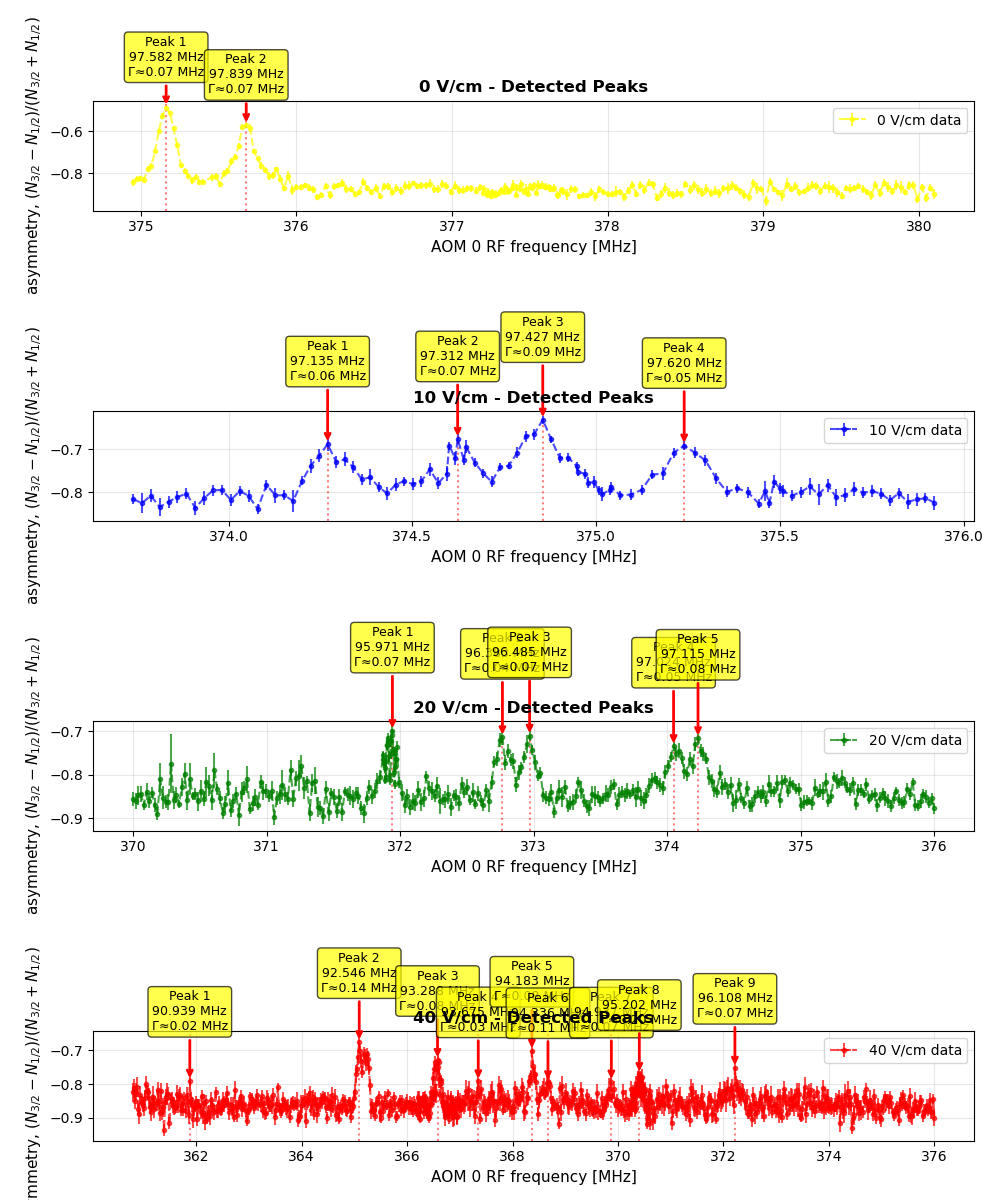

<IPython.core.display.Javascript object>


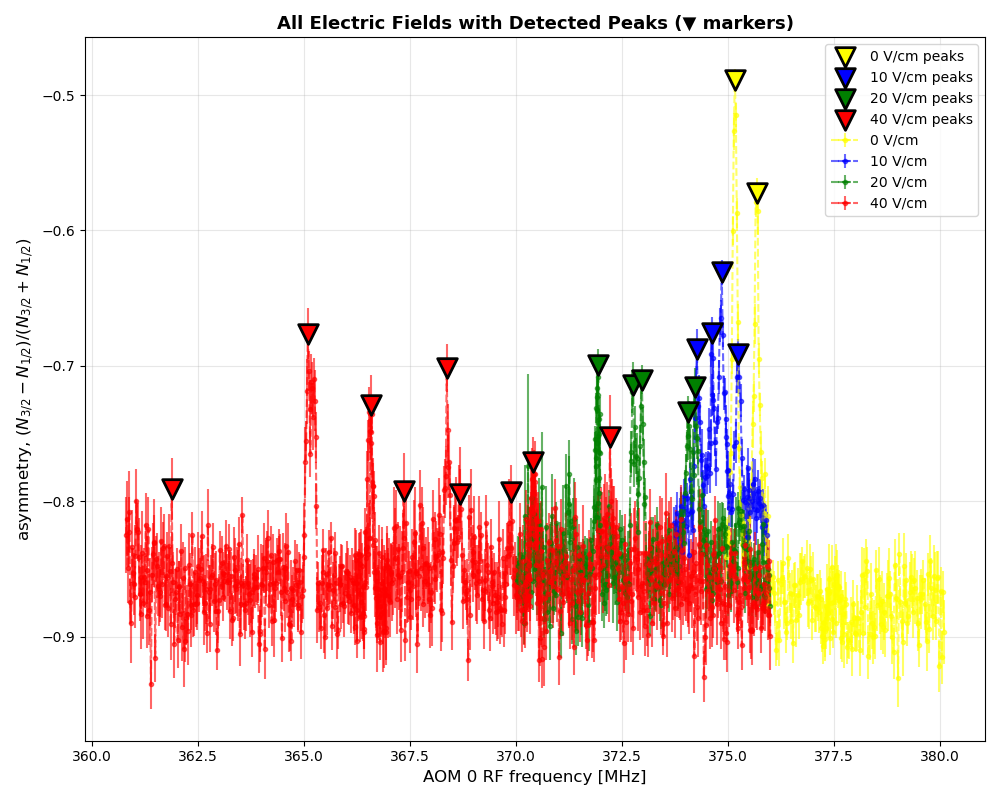


Peak detection complete! Peak info stored in 'peaks_info' dictionary

✓ Exported 20 peaks to 'synthetic_peaks.csv'
  - 0 V/cm: 2 peaks
  - 10 V/cm: 4 peaks
  - 20 V/cm: 5 peaks
  - 40 V/cm: 9 peaks

This file can be loaded in the prediction notebook using:
  UNASSIGNED_DATA_PATH = Path('synthetic_peaks.csv')


In [65]:
print('Before running this cell, run the cell above first!!')



# Peak detection and visualization
from scipy.signal import find_peaks
import pandas as pd

# ============ ADJUSTABLE PARAMETERS ============
# Asymmetry threshold for each electric field (minimum asymmetry magnitude to consider as peak)
# Adjust these values to filter out weak peaks for each dataset
ASYMMETRY_THRESHOLDS = {
    '0': -0.75,  # 0 V/cm threshold
    '10': -0.75,  # 10 V/cm threshold
    '20': -0.76,  # 20 V/cm threshold
    '40': -0.798   # 40 V/cm threshold
}
# Minimum prominence for peak detection
MIN_PROMINENCE = 0.02

# Flag to use cell 86 data for 40 V/cm instead of cell 77 data
USE_CELL_86_FOR_40V = True  # Set to False to use combined_data['40']
# ===============================================

# Dictionary to store peak information
peaks_info = {}

# Parameters for peak finding
# Assuming data spacing, estimate minimum distance between peaks in data points
# For 0.1 MHz linewidth, we need to determine the frequency spacing in the data

for field_str in ['0', '10', '20', '40']:
    # Use cell 86 data for 40 V/cm if flag is set
    if field_str == '40' and USE_CELL_86_FOR_40V:
        # Check if cell 86 data is available (unique_freqs, averaged_asymmetries, asymmetry_err)
        try:
            freqs = unique_freqs  # From cell 86
            asymmetries = averaged_asymmetries  # From cell 86
            errors = asymmetry_err  # From cell 86
            print(f"Using cell 86 data for 40 V/cm ({len(freqs)} frequency points)")
        except NameError:
            print("Warning: Cell 86 not executed. Run cell 86 first, or set USE_CELL_86_FOR_40V = False")
            print("Falling back to combined_data['40']")
            data = combined_data[field_str]
            freqs = data['freq']
            asymmetries = data['asymmetry']
            errors = data['error']
    elif field_str == '0':
        freqs = freq_00  # From cell 
        asymmetries = asym_00  # From cell 
        errors = asym_err_00  # From cell             
    else:
        data = combined_data[field_str]
        freqs = data['freq']
        asymmetries = data['asymmetry']
        errors = data['error']
    
    # Get threshold for this specific field
    threshold = ASYMMETRY_THRESHOLDS[field_str]
    
    # Calculate average frequency spacing
    if len(freqs) > 1:
        freq_spacing = np.median(np.diff(freqs))
        # Convert 0.1 MHz linewidth to number of data points
        # We expect peaks separated by at least ~0.1 MHz
        min_distance_points = int(0.1e6 / freq_spacing)
    else:
        min_distance_points = 5  # Default fallback
    
    # Find peaks where asymmetry magnitude is large
    # Looking for prominent features (peaks in absolute value)
    peaks, properties = find_peaks(asymmetries, 
                                   prominence=MIN_PROMINENCE,  # Minimum prominence
                                   distance=min_distance_points,  # Minimum separation
                                   width=1,  # Minimum width in points
                                   height=threshold)  # Field-specific asymmetry threshold
    
    # Convert width from data points to MHz
    if 'widths' in properties:
        peak_widths_MHz = properties['widths'] * freq_spacing / 1e6
    else:
        peak_widths_MHz = np.zeros(len(peaks))
    
    # Store peak information
    peaks_info[field_str] = {
        'indices': peaks,
        'frequencies': freqs[peaks],
        'asymmetries': asymmetries[peaks],
        'properties': properties,
        'widths_MHz': peak_widths_MHz
    }
    
    print(f"\n{field_str} V/cm: Found {len(peaks)} peaks")
    for i, (idx, freq, asym, width) in enumerate(zip(peaks, freqs[peaks], asymmetries[peaks], peak_widths_MHz)):
        print(f"  Peak {i+1}: {freq/1e6:.4f} MHz, asymmetry={asym:.4f}, width≈{width:.3f} MHz")

# Create detailed plots for each electric field with peak annotations
fig, axes = plt.subplots(4, 1, figsize=(10, 12))
colors = {'0': 'yellow', '10': 'blue', '20': 'green', '40': 'red'}

for idx, field_str in enumerate(['0','10', '20', '40']):
    ax = axes[idx]
    
    # Get the correct data for plotting (use cell 86 data for 40 V/cm if flag is set)
    if field_str == '40' and USE_CELL_86_FOR_40V:
        try:
            plot_freqs = unique_freqs
            plot_asyms = averaged_asymmetries
            plot_errs = asymmetry_err
        except NameError:
            data = combined_data[field_str]
            plot_freqs = data['freq']
            plot_asyms = data['asymmetry']
            plot_errs = data['error']
    elif field_str == '0':
        plot_freqs = freq_00  # From cell 
        plot_asyms = asym_00  # From cell 
        plot_errs = asym_err_00  # From cell 
    else:
        data = combined_data[field_str]
        plot_freqs = data['freq']
        plot_asyms = data['asymmetry']
        plot_errs = data['error']
    
    peak_data = peaks_info[field_str]
    
    # Plot data with error bars
    ax.errorbar(2*plot_freqs/1e6 + 180, plot_asyms, yerr=plot_errs,
               xerr=0, marker='.', linestyle='--', color=colors[field_str],
               alpha=0.7, label=f'{field_str} V/cm data')
    
    # Mark peaks with vertical lines and arrows
    for i, (idx_peak, freq, asym, width) in enumerate(zip(peak_data['indices'], 
                                                           peak_data['frequencies'], 
                                                           peak_data['asymmetries'],
                                                           peak_data['widths_MHz'])):
        # Vertical line at peak
        ax.axvline(2*freq/1e6 + 180, color='red', linestyle=':', alpha=0.5, linewidth=1.5)
        
        # Arrow annotation
        ax.annotate(f'Peak {i+1}\n{freq/1e6:.3f} MHz\nΓ≈{width:.2f} MHz',
                   xy=(2*freq/1e6 + 180, asym),
                   xytext=(2*freq/1e6 + 180, asym + 0.15),
                   arrowprops=dict(arrowstyle='->', color='red', lw=2),
                   fontsize=9, ha='center',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    ax.set_xlabel('AOM 0 RF frequency [MHz]', fontsize=11)
    ax.set_ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$', fontsize=11)
    ax.set_title(f'{field_str} V/cm - Detected Peaks', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create overlay comparison plot
plt.figure(figsize=(10, 8))

for field_str in ['0', '10', '20', '40']:

    # Get the correct data for plotting
    if field_str == '40' and USE_CELL_86_FOR_40V:
        try:
            plot_freqs = unique_freqs
            plot_asyms = averaged_asymmetries
            plot_errs = asymmetry_err
        except NameError:
            data = combined_data[field_str]
            plot_freqs = data['freq']
            plot_asyms = data['asymmetry']
            plot_errs = data['error']
    elif field_str == '0':
        plot_freqs = freq_00  # From cell 
        plot_asyms = asym_00  # From cell 
        plot_errs = asym_err_00  # From cell 
    else:
        data = combined_data[field_str]
        plot_freqs = data['freq']
        plot_asyms = data['asymmetry']
        plot_errs = data['error']
    
    peak_data = peaks_info[field_str]
    
    # Plot data
    plt.errorbar(2*plot_freqs/1e6 + 180, plot_asyms, yerr=plot_errs,
                xerr=0, marker='.', linestyle='--', color=colors[field_str],
                alpha=0.6, label=f'{field_str} V/cm')
    
    # Mark peaks with symbols
    plt.scatter(2*peak_data['frequencies']/1e6 + 180, peak_data['asymmetries'],
               marker='v', s=200, color=colors[field_str], edgecolors='black',
               linewidths=2, zorder=5, label=f'{field_str} V/cm peaks')

plt.xlabel('AOM 0 RF frequency [MHz]', fontsize=12)
plt.ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$', fontsize=12)
plt.title('All Electric Fields with Detected Peaks (▼ markers)', fontsize=13, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Peak detection complete! Peak info stored in 'peaks_info' dictionary")
print("="*60)

# ============================================================================
# EXPORT PEAKS TO CSV FILE
# ============================================================================
# Create CSV file in the format expected by the prediction notebook
csv_data = []

for field_str in ['0','10', '20', '40']:
    peak_data = peaks_info[field_str]
    Ez_V_per_cm = float(field_str)
    spectrum_id = f'spec{field_str}'
    
    for freq, width in zip(peak_data['frequencies'], peak_data['widths_MHz']):
        csv_data.append({
            'spectrum_id': spectrum_id,
            'Ez_V_per_cm': Ez_V_per_cm,
            'Bz_G': 0.0,  # Assuming no magnetic field
            'nu_obs_MHz': (2* freq / 1e6) + 180,  # Convert Hz to MHz
            'sigma_MHz': 0.10  # Use linewidth from UNASSIGNED_SIGMA (100 kHz)
        })

# Create DataFrame and save to CSV
df_peaks = pd.DataFrame(csv_data)
csv_filename = 'synthetic_peaks.csv'
df_peaks.to_csv(csv_filename, index=False)

print(f"\n✓ Exported {len(csv_data)} peaks to '{csv_filename}'")
print(f"  - 0 V/cm: {len(peaks_info['0']['frequencies'])} peaks")
print(f"  - 10 V/cm: {len(peaks_info['10']['frequencies'])} peaks")
print(f"  - 20 V/cm: {len(peaks_info['20']['frequencies'])} peaks")
print(f"  - 40 V/cm: {len(peaks_info['40']['frequencies'])} peaks")
print(f"\nThis file can be loaded in the prediction notebook using:")
print(f"  UNASSIGNED_DATA_PATH = Path('synthetic_peaks.csv')")
print("="*60)
print("="*60)

[    11 100002 100004 100005 100006]
average scattering photons:  8287.095158597664
bin: 0
average signal size 9582.401502504174
average asymmetry 0.5230305869884224
std of asymmetry 0.03871032360204239
error of asymmetry 0.0011184031789103134
bin: 0
average signal size filtered 9582.401502504174
average asymmetry filtered 0.5230305869884224
std of asymmetry filtered 0.03871032360204239
error of asymmetry filtered 0.0011184031789103134
number of useful shots: 1198
average scattering photons:  8110.922746781116
bin: 0
average signal size 8220.528612303291
average asymmetry 0.6181523988825017
std of asymmetry 0.034065823816646953
error of asymmetry 0.0009110984552007888
bin: 0
average signal size filtered 8220.528612303291
average asymmetry filtered 0.6181523988825017
std of asymmetry filtered 0.034065823816646953
error of asymmetry filtered 0.0009110984552007888
number of useful shots: 1398
average scattering photons:  8051.287878787879
bin: 0
average signal size 7331.368686868687
avera

<IPython.core.display.Javascript object>


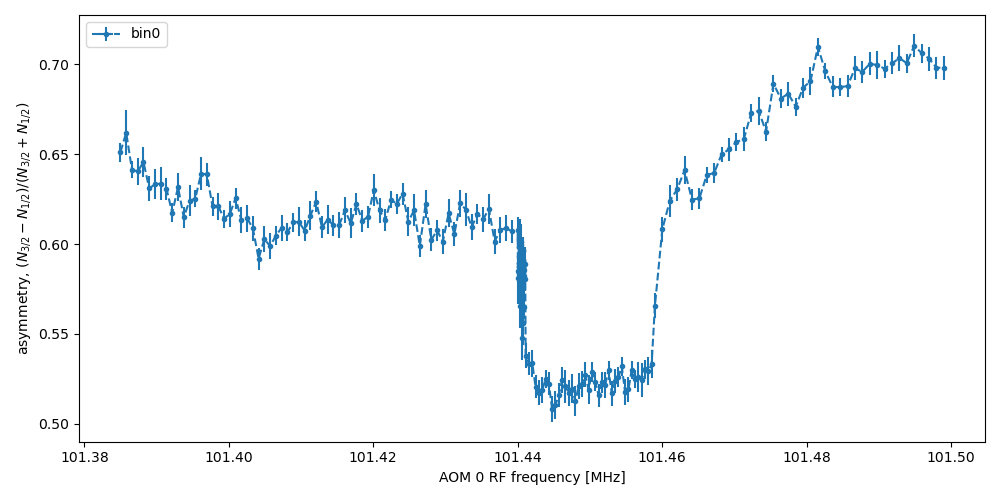

In [104]:
#the code that does NOT assume photon counts limited by shot noise, correct one


both_signal_bin = True

scan_numbers_1 = [11]
scan_numbers_2 = [2,4,5,6]
scan_numbers = np.concatenate((
    np.asarray(scan_numbers_1, dtype=int),
    100000 + np.asarray(scan_numbers_2, dtype=int)
))
print(scan_numbers)

scattering_bins = [1]

import numpy as np
import matplotlib.pyplot as plt


#save_folder = '/home/harish/Hutzler Lab Dropbox/HutzlerLabShared/Personal/HarishRamachandran/data/'
save_folder_1 = 'F:\\Hutzler Lab Dropbox\\HutzlerLabData\\Orange Beam Source\\PXI Data\\20251013\\'
save_folder_2 = 'F:\\Hutzler Lab Dropbox\\HutzlerLabData\\Orange Beam Source\\PXI Data\\20251014\\'

freq_plot_filt_combined = []
asymmetry_filt_combined = []
for jiji in [0]:
    for scan_number in scan_numbers:
        if scan_number < 10000:
            data = np.load(save_folder_1+f'scan_{scan_number}.npz')
        elif scan_number > 10000:
            data = np.load(save_folder_2+f'scan_{scan_number-100000}.npz')
        a_counts = data['a_counts']
        b_counts = data['b_counts']
        frequencies_0 = data['frequencies_0']


        offset = 1
        signal_bin = jiji
        first_shot = 0
        last_shot = len(a_counts[0])-1

        print('average scattering photons: ', np.mean(np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1)))

        if both_signal_bin:
            a_diff = (a_counts[0,first_shot:last_shot-offset,0] + a_counts[0,first_shot:last_shot-offset,1] - 2*np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
            b_diff = (b_counts[0,first_shot:last_shot-offset,0] + b_counts[0,first_shot:last_shot-offset,1] - 2*np.mean(b_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
        else:
            a_diff = (a_counts[0,first_shot:last_shot-offset,signal_bin] - np.mean(a_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
            b_diff = (b_counts[0,first_shot:last_shot-offset,signal_bin] - np.mean(b_counts[0, first_shot:last_shot-offset, :][:, scattering_bins], axis=1))
        freq_plot = frequencies_0[first_shot+offset:last_shot]
        sum_counts = a_diff + b_diff
        difference_counts = a_diff - b_diff

        asymmetry = difference_counts/sum_counts

        print('bin:', signal_bin)
        print('average signal size',np.mean(sum_counts))
        print('average asymmetry',np.mean(asymmetry))
        print('std of asymmetry',np.std(asymmetry))
        print('error of asymmetry',np.std(asymmetry)/np.sqrt(len(asymmetry)))

        plt.figure(10)
        plt.plot(sum_counts)
        plt.show()


        plt.figure(11)
        plt.plot(asymmetry)
        plt.show()


        filter_outliers = np.logical_and(np.logical_and(sum_counts > 1000, asymmetry < 0.99),
                                         np.logical_and(sum_counts < 900000, asymmetry > -0.99))
        a_diff_filt = a_diff[filter_outliers]
        b_diff_filt = b_diff[filter_outliers]
        freq_plot_filt = freq_plot[filter_outliers]

        sum_counts_filt = a_diff_filt + b_diff_filt
        difference_counts_filt = a_diff_filt - b_diff_filt

        asymmetry_filt = difference_counts_filt/sum_counts_filt

        print('bin:', signal_bin)
        print('average signal size filtered',np.mean(sum_counts_filt))
        print('average asymmetry filtered',np.mean(asymmetry_filt))
        print('std of asymmetry filtered',np.std(asymmetry_filt))
        print('error of asymmetry filtered',np.std(asymmetry_filt)/np.sqrt(len(asymmetry_filt)))



        num_useful_shots = len(freq_plot_filt)
        print('number of useful shots:',num_useful_shots)

        plt.figure(12)
        plt.plot(freq_plot_filt/1e6, asymmetry_filt, marker='.', linestyle='')
        plt.xlabel('AOM 0 RF frequency [MHz]')
        plt.ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$')
        #plt.text(101.52, -0.25, r'$N$ ='+f' {num_useful_shots}', horizontalalignment='right')
        plt.tight_layout()
        #plt.savefig('single_shot.pdf')
        plt.show()

        freq_plot_filt_combined.append(freq_plot_filt)
        asymmetry_filt_combined.append(asymmetry_filt)


    All_freq_plot_filt = np.concatenate(freq_plot_filt_combined)
    All_asymmetry_filt = np.concatenate(asymmetry_filt_combined)

    import numpy as np
    import matplotlib.pyplot as plt

    def average_and_error_at_frequency(freq_plot_filt, asymmetry_filt):
        """Averages asymmetry values and calculates the standard error for each unique frequency.

        Args:
            freq_plot_filt: 1D numpy array of frequencies.
            asymmetry_filt: 1D numpy array of asymmetry values (same size as freq_plot_filt).

        Returns:
            tuple: (unique_frequencies, averaged_asymmetries, errors)
                   where unique_frequencies is a sorted 1D numpy array of unique frequencies,
                   averaged_asymmetries is a 1D numpy array of corresponding averaged
                   asymmetry values, and errors is a 1D numpy array of the standard errors.
                   Returns empty arrays if input arrays are empty or of different sizes.
        """
        if not freq_plot_filt.size or not asymmetry_filt.size or freq_plot_filt.size != asymmetry_filt.size:
            return np.array([]), np.array([]), np.array([])

        unique_freqs = np.unique(freq_plot_filt)
        averaged_asymmetries = []
        errors = []

        for freq in unique_freqs:
            indices = np.where(freq_plot_filt == freq)[0]
            asymmetries_at_freq = asymmetry_filt[indices]
            average_asymmetry = np.mean(asymmetries_at_freq)
            std_dev = np.std(asymmetries_at_freq)
            num_points = len(asymmetries_at_freq)
            error = std_dev / np.sqrt(num_points) if num_points > 0 else 0 # Handle cases where num_points is 0 to avoid ZeroDivisionError
            averaged_asymmetries.append(average_asymmetry)
            errors.append(error)

        return unique_freqs, np.array(averaged_asymmetries), np.array(errors)


    unique_freqs, averaged_asymmetries, asymmetry_err = average_and_error_at_frequency(All_freq_plot_filt, All_asymmetry_filt)

    plt.figure(figsize = (10,5))
    plt.errorbar(unique_freqs/1000000, averaged_asymmetries,yerr=asymmetry_err, xerr=0, marker='.', linestyle='--', label = 'bin'+str(jiji))
#plt.figure(11233)
plt.xlabel('AOM 0 RF frequency [MHz]')
plt.ylabel(r'asymmetry, $\left(N_{3/2} - N_{1/2}\right)/\left(N_{3/2} + N_{1/2}\right)$')
plt.tight_layout()
plt.legend()
#plt.xlim(97.5e6, 97.75e6)
plt.show()


In [ ]:
def median_manual(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    mid = n // 2
    
    if n % 2 == 0:  # even number of elements
        return (sorted_arr[mid - 1] + sorted_arr[mid]) / 2
    else:           # odd number of elements
        return sorted_arr[mid]

In [41]:
import labjack.ljm as ljm
import sys
import time

# --- Configuration ---
# You can connect via USB ("ANY"), Ethernet ("ETHERNET"), or WiFi ("WIFI")
# For simplicity, we'll try to find any connected T7 via USB.
# If you have multiple LabJacks, you might need to specify the serial number.
# The ljm.constants.dtANY and ljm.constants.ctANY are integer values.
# The openS function expects string representations for these.
device_type = "ANY" # Use "ANY" string instead of ljm.constants.dtANY
connection_type = "ANY" # Use "ANY" string instead of ljm.constants.ctANY
identifier = "ANY" # Or specify a serial number like "470010000" if you have multiple T7s

# --- Open LabJack Device ---
handle = 0 # Initialize handle to 0
try:
    print(f"Attempting to open LabJack T7 (Device Type: {device_type}, Connection Type: {connection_type}, Identifier: {identifier})...")
    # Open the first available LabJack T7 device
    handle = ljm.openS(device_type, connection_type, identifier)
    info = ljm.getHandleInfo(handle)
    print("\nSuccessfully connected to LabJack!")
    print(f"Device Type: {info[0]} (T{info[0]-70})") # T7 is device type 7
    print(f"Connection Type: {info[1]}")
    print(f"Serial Number: {info[2]}")
    print(f"IP Address: {ljm.numberToIP(info[3])}") # Convert IP number to string
    print(f"Firmware Version: {info[4]:.2f}")

    # --- Read a Value (e.g., Analog Input AIN0) ---
    # AIN0 is typically the first analog input channel.
    # It's good practice to read a known value to confirm communication.
    ain0_value = ljm.eReadName(handle, "AIN0")
    print(f"\nRead AIN0 value: {ain0_value:.4f} V")

    # --- Write a Digital Output (e.g., FIO0) ---
    # FIO0 is a common digital I/O pin.
    # We'll toggle it high and low.
    print("\nToggling FIO0 digital output...")
    ljm.eWriteName(handle, "FIO0", 1) # Set FIO0 high (3.3V)
    print("FIO0 set to HIGH. Waiting 1 second...")
    time.sleep(1)
    ljm.eWriteName(handle, "FIO0", 0) # Set FIO0 low (0V)
    print("FIO0 set to LOW. Waiting 1 second...")
    time.sleep(1)
    ljm.eWriteName(handle, "FIO0", 1) # Set FIO0 high again
    print("FIO0 set to HIGH. Waiting 1 second...")
    time.sleep(1)
    ljm.eWriteName(handle, "FIO0", 0) # Set FIO0 low again
    print("FIO0 set to LOW.")

    # --- Read Multiple Values (e.g., AIN0, AIN1, FIO_STATE) ---
    # This shows how to read multiple registers efficiently.
    names = ["AIN0", "AIN1", "FIO_STATE"]
    # FIX: Swapped the order of 'names' and 'len(names)'
    results = ljm.eReadNames(handle, len(names), names)
    print("\nRead multiple values:")
    for i in range(len(names)):
        print(f"  {names[i]}: {results[i]:.4f}")

except ljm.LJMError as e:
    print(f"\nLJM Error: {e}")
    if handle != 0:
        ljm.close(handle) # Ensure handle is closed if an LJM error occurred after opening
    sys.exit(1)
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")
    if handle != 0:
        ljm.close(handle)
    sys.exit(1)
finally:
    # --- Close LabJack Device ---
    if handle != 0:
        ljm.close(handle)
        print("\nLabJack connection closed.")


Attempting to open LabJack T7 (Device Type: ANY, Connection Type: ANY, Identifier: ANY)...

Successfully connected to LabJack!
Device Type: 7 (T-63)
Connection Type: 1
Serial Number: 470036179
IP Address: 0.0.0.0
Firmware Version: 0.00

Read AIN0 value: 10.1160 V

Toggling FIO0 digital output...
FIO0 set to HIGH. Waiting 1 second...
FIO0 set to LOW. Waiting 1 second...
FIO0 set to HIGH. Waiting 1 second...
FIO0 set to LOW.

Read multiple values:
  AIN0: 10.1160
  AIN1: 7.1139
  FIO_STATE: 254.0000

LabJack connection closed.


inc_x, inc_y 0.0 0.07999999999999996
inc_x, inc_y 0.0 0.08000000000000007
inc_x, inc_y 0.0 0.07999999999999996
inc_x, inc_y 0.0 0.08000000000000002
inc_x, inc_y 0.0 0.08000000000000002
inc_x, inc_y 0.0 0.07999999999999996
inc_x, inc_y 0.0 0.08000000000000007
inc_x, inc_y 0.0 0.07999999999999996
inc_x, inc_y 0.07999999999999996 0.05
inc_x, inc_y 0.07999999999999996 0.05
inc_x, inc_y 0.07999999999999996 0.05
inc_x, inc_y 0.07999999999999996 0.05
inc_x, inc_y 0.07999999999999996 0.05
inc_x, inc_y 0.07999999999999996 0.05
inc_x, inc_y 0.08000000000000002 0.05000000000000002
inc_x, inc_y 0.08000000000000002 0.04999999999999999
inc_x, inc_y 0.08000000000000002 0.04999999999999999
inc_x, inc_y 0.08000000000000002 0.04999999999999999
inc_x, inc_y 0.08 0.04999999999999999
inc_x, inc_y 0.08 0.04999999999999999
inc_x, inc_y 0.08 0.04999999999999999
inc_x, inc_y 0.08 0.04999999999999999
inc_x, inc_y 0.08000000000000002 0.050000000000000044
inc_x, inc_y 0.08000000000000002 0.050000000000000044
inc_

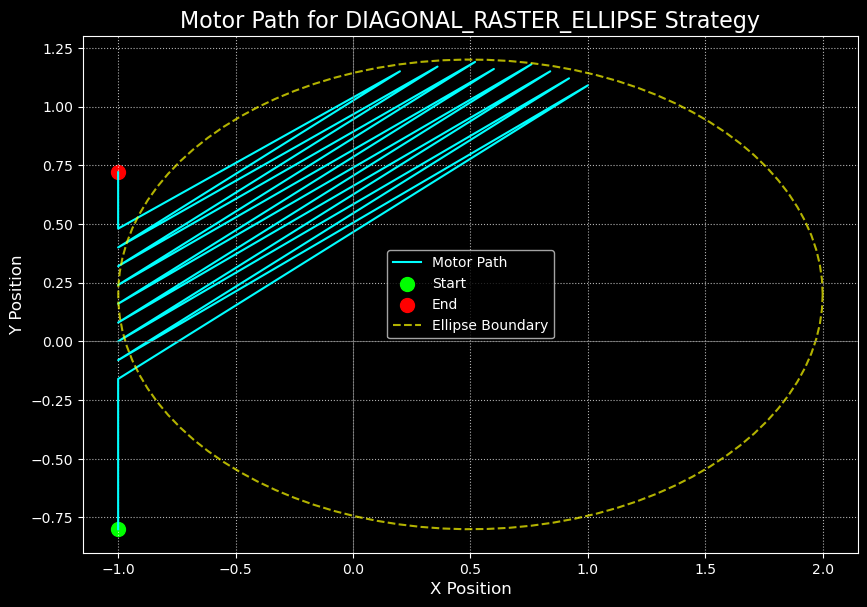

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def decide_move_increments(strategy, strategy_state, current_metric):
    """
    Decides the next motor increments based on the chosen strategy and current state.

    Args:
        strategy (str): The active strategy ('FIXED_RASTER', 'MANUAL_INCREMENT',
                        'SIMPLE_HILL_CLIMB', 'IDLE', etc.).
        strategy_state (dict): A dictionary holding persistent state information
                               needed for the chosen strategy.
        current_metric (float): The metric value used for decision making (e.g., a_diff).

    Returns:
        tuple: (next_increment_x, next_increment_y, updated_strategy_state)
               next_increment_x (float): Calculated X increment.
               next_increment_y (float): Calculated Y increment.
               updated_strategy_state (dict): The potentially modified state dictionary.
    """
    # Default increments (no move)
    inc_x, inc_y = 0.0, 0.0
    state = strategy_state # Use a shorter alias

    #print(f"Deciding increments: Strategy='{strategy}', Metric={current_metric:.2f}")

    # --- Strategy Implementations ---

    if strategy == 'IDLE':
        # print("  Strategy: IDLE -> No move (0, 0)")
        pass # inc_x, inc_y remain 0

    elif strategy == 'FIXED_RASTER':
        # Simple fixed step rastering, increments defined in state
        inc_x = state.get('raster_fixed_inc_x', 0.1) # Default 0.1 if not set
        inc_y = state.get('raster_fixed_inc_y', 0.0) # Default 0.0 if not set
        # print(f"  Strategy: FIXED_RASTER -> Fixed increments ({inc_x}, {inc_y})")

    elif strategy == 'MANUAL_INCREMENT':
        # Use manually set increments from state, then clear them for next time
        inc_x = state.get('manual_inc_x', 0.0)
        inc_y = state.get('manual_inc_y', 0.0)
        # print(f"  Strategy: MANUAL_INCREMENT -> Using ({inc_x}, {inc_y}) from state")
        # Clear the manual increments in the state dictionary so this move only happens once
        state['manual_inc_x'] = 0.0
        state['manual_inc_y'] = 0.0

    elif strategy == 'SIMPLE_SNAKE_RASTER':
        # Basic raster without needing absolute position. Moves fixed steps in X,
        # then steps Y, then reverses X. Requires state variables.
        steps_per_line = state.get('raster_steps_per_line', 10) # Steps in X before Y step
        line_count = state.get('raster_line_count', 0)       # Which line number
        step_count = state.get('raster_step_count', 0)       # Step count along current line
        step_x = state.get('raster_x_inc', 0.1)             # X increment size
        step_y = state.get('raster_y_inc', 0.1)             # Y increment size
        direction_x = 1 if (line_count % 2 == 0) else -1      # Determine X direction (+ or -)

        if step_count < steps_per_line - 1 : # Check if steps remain on current line
            # Move in X
            inc_x = direction_x * step_x
            inc_y = 0.0
            state['raster_step_count'] = step_count + 1 # Increment step count on this line
            # print(f"  Strategy: SNAKE_RASTER -> Line {line_count}, Step {step_count+1}/{steps_per_line}, Dir {direction_x}, Incs ({inc_x},{inc_y})")
        else:
            # End of line reached, step in Y
            inc_x = 0.0
            inc_y = step_y
            state['raster_step_count'] = 0        # Reset step count for the new line
            state['raster_line_count'] = line_count + 1 # Increment line count
            # Direction_x will be reversed on the next call based on new line_count
            # print(f"  Strategy: SNAKE_RASTER -> End of Line {line_count}. Stepping Y. Next line {line_count+1}, Incs ({inc_x},{inc_y})")
            # Optional: Add check for max lines state.get('raster_max_lines', 10)

    elif strategy == 'SIMPLE_HILL_CLIMB':
        # Very basic hill climb maximizing 'current_metric'. Needs state.
        # NOTE: This is sensitive to noise and local maxima as it doesn't know absolute positions.
        step = state.get('optimize_step', 0.05)           # Size of exploration step
        last_metric = state.get('last_metric', -np.inf) # Initialize low for maximization
        explore_phase = state.get('explore_phase', 0)   # 0: try +x, 1: try -x, 2: try +y, 3: try -y
        last_inc_x = state.get('last_inc_x', 0.0)       # Store last move made
        last_inc_y = state.get('last_inc_y', 0.0)       # Store last move made

        if current_metric > last_metric + 1e-6: # Improved (added small tolerance)
            # print(f"  Hill Climb: Improved! ({current_metric:.2f} > {last_metric:.2f}). Repeating last move or starting explore.")
            state['last_metric'] = current_metric
            state['explore_phase'] = 0 # Reset exploration phase
            # Option 1: Repeat the last successful move (if there was one)
            if last_inc_x != 0.0 or last_inc_y != 0.0:
                 inc_x, inc_y = last_inc_x, last_inc_y
                 # print(f"  -> Repeating last increments ({inc_x}, {inc_y})")
            else: # Start exploring from scratch
                 inc_x, inc_y = step, 0.0
                 state['explore_phase'] = 0
                 # print(f"  -> Starting exploration with (+X): ({inc_x}, {inc_y})")

        else: # No improvement, try next exploration direction
            # print(f"  Hill Climb: No improvement ({current_metric:.2f} <= {last_metric:.2f}). Trying next direction.")
            explore_phase = (explore_phase + 1) % 4 # Cycle through 0, 1, 2, 3
            state['explore_phase'] = explore_phase

            # Determine increments based on exploration phase
            if explore_phase == 0: inc_x, inc_y = step, 0.0    # Try +X
            elif explore_phase == 1: inc_x, inc_y = -step, 0.0   # Try -X
            elif explore_phase == 2: inc_x, inc_y = 0.0, step    # Try +Y
            elif explore_phase == 3: inc_x, inc_y = 0.0, -step   # Try -Y
            # print(f"  -> Exploring Phase {explore_phase}, Incrs ({inc_x}, {inc_y})")
            # Don't update last_metric here as it didn't improve

        # Store the increments we are *about* to use for the next cycle's comparison
        state['last_inc_x'] = inc_x
        state['last_inc_y'] = inc_y

    elif strategy == 'SPIRAL_OUTWARD': # Renamed for clarity
            # Spiral strategy starting from the center and moving outwards.

            # --- Initialization (runs only the first time this strategy is active) ---
            if 'spiral_radius' not in state: # Check if strategy just started
                # print("  Initializing SPIRAL_OUTWARD state...")
                state['spiral_radius'] = 0.0  # Start at the center
                state['spiral_angle'] = 0.0  # Start at angle 0

                # !! IMPORTANT !! Storing the Center:
                # Ideally, you capture the *actual* motor position when this strategy
                # starts and store it as the center. This requires modification
                # outside this function (e.g., reading position before the loop or
                # when switching strategy). Let's assume it's stored:
                # state['center_x'] = actual_current_x_at_start
                # state['center_y'] = actual_current_y_at_start
                # If not available, the increment calculation below still works,
                # but boundary checks etc., would need the center info.
                if 'center_x' not in state: state['center_x'] = 'Unknown' # Mark as unknown if not provided
                if 'center_y' not in state: state['center_y'] = 'Unknown'

            # --- Parameters (get from state or use defaults) ---
            # Angular step per move (e.g., 10 degrees)
            dtheta = state.get('spiral_dtheta', np.pi / 18)
            # How much the radius increases each step
            dradius = state.get('spiral_dradius', 0.05) # Smaller increment for outward spiral
            # Optional: Maximum radius to stop the spiral
            max_radius = state.get('spiral_max_radius', 5.0) # Stop after reaching radius 5.0

            # --- Calculation ---
            current_angle = state['spiral_angle']
            current_radius = state['spiral_radius']

            # Calculate the *next* position's angle and radius
            new_angle = current_angle + dtheta
            new_radius = current_radius + dradius # INCREASE radius

            # Check if max radius reached
            if current_radius >= max_radius:
                # print(f"  Strategy: SPIRAL_OUTWARD -> Max radius ({max_radius:.2f}) reached. Switching to IDLE.")
                # Stop the spiral by setting increments to zero and changing strategy
                inc_x = 0.0
                inc_y = 0.0
                state['strategy'] = 'IDLE' # Request strategy change for next cycle
            else:
                # If max radius not reached, calculate increments.
                # This calculates the vector from the current theoretical spiral point
                # to the next theoretical spiral point.
                inc_x = new_radius * np.cos(new_angle) - current_radius * np.cos(current_angle)
                inc_y = new_radius * np.sin(new_angle) - current_radius * np.sin(current_angle)

                # Store the updated angle and radius for the next iteration
                state['spiral_angle'] = new_angle
                state['spiral_radius'] = new_radius
                # print(f"  Strategy: SPIRAL_OUTWARD -> Angle:{new_angle:.2f} rad, Radius:{new_radius:.2f}, Incs:({inc_x:.3f}, {inc_y:.3f})")

            # Note: The actual path traced depends on the initial starting position being treated
            # as the center when the strategy began. This calculation assumes the motor
            # successfully reached the previous theoretical point. Over many steps, some
            # drift relative to the true starting center might occur if moves aren't perfect.


    elif strategy == 'COARSE_TO_FINE':
        # In this strategy, take a big (coarse) step until the metric drops below a threshold,
        # then switch to a fine step.
        coarse_threshold = state.get('coarse_threshold', 1000)  # Define threshold for "high" metric
        coarse_increment = state.get('coarse_increment', 0.5)     # Coarse step size
        fine_increment = state.get('fine_increment', 0.1)         # Fine step size

        if 'in_fine_mode' not in state:
            state['in_fine_mode'] = False

        if current_metric > coarse_threshold and not state['in_fine_mode']:
            # Still in coarse mode.
            inc_x = coarse_increment
            inc_y = coarse_increment
            # print(f"  Strategy: COARSE_TO_FINE (coarse) -> Incs: ({inc_x}, {inc_y})")
        else:
            # Metric is low, so switch to fine mode.
            state['in_fine_mode'] = True
            inc_x = fine_increment
            inc_y = fine_increment
            # print(f"  Strategy: COARSE_TO_FINE (fine) -> Incs: ({inc_x}, {inc_y})")

    elif strategy == 'BOUNDARY_SCAN':
        # Phase 1: scan +X until metric drops → record x_max
        # Phase 2: scan –X until metric drops → record x_min
        # Phase 3: scan +Y (at center) until metric drops → record y_max
        # Phase 4: scan –Y until metric drops → record y_min
        # Then switch to FINE_SCAN or DONE.
        phase    = state.get('phase', 1)
        center_x = state.get('center_x', 0.0)
        center_y = state.get('center_y', 0.0)
        step_coarse = state.get('coarse_increment', 0.1)
        threshold   = state.get('metric_threshold',  0.5)
        bounds      = state.setdefault('bounds', {})

        if phase == 1:
            # move +X until we lose signal
            inc_x, inc_y = step_coarse, 0
            if current_metric < threshold:
                bounds['x_max'] = state['current_x']
                phase = 2
        elif phase == 2:
            # reset to center, then move –X
            inc_x = center_x - state['current_x']
            inc_y = 0
            phase = 3
        elif phase == 3:
            inc_x, inc_y = -step_coarse, 0
            if current_metric < threshold:
                bounds['x_min'] = state['current_x']
                phase = 4
        elif phase == 4:
            # Move both axes back to the center before Y sweep
            inc_x = center_x - state['current_x']
            inc_y = center_y - state['current_y']
            # print(f"  BoundaryScan: moving to center ({center_x:.2f},{center_y:.2f}) before Y sweep")
            # Advance to the actual +Y sweep
            phase = 5
        elif phase == 5:
            inc_x, inc_y = 0, step_coarse
            if current_metric < threshold:
                bounds['y_max'] = state['current_y']
                phase = 6
        elif phase == 6:
            inc_x = 0; inc_y = center_y - state['current_y']
            phase = 7
        elif phase == 7:
            inc_x, inc_y = 0, -step_coarse
            if current_metric < threshold:
                bounds['y_min'] = state['current_y']
                phase = 8
        else:
            # All four edges found → switch to fine scan or idle.
            state['strategy'] = 'IDLE'
            inc_x, inc_y     = 0, 0

        state['phase'] = phase
        #return inc_x, inc_y, state


    elif strategy == 'SNAKE_RASTER_RECOVERY_LIMIT':
        # --- existing setup ---
        step_x = state.get('raster_x_inc', 0.01)
        step_y = state.get('raster_y_inc', 0.01)
        thresh = state.get('signal_threshold', 0.5)
        min_thresh = state.get('minimum_signal_threshold', 100)
        max_rec  = state.get('max_recovery_steps', 5)

        move_axis     = state.get('move_axis',  'y')
        dir_x     = state.get('direction_x',  1)
        dir_y     = state.get('direction_y',  1)
        recovering= state.get('recovering',   False)
        rec_count = state.get('recovery_counter', 0)
        last_x    = state.get('last_valid_x',  state.get('current_x', 0.0))
        last_y    = state.get('last_valid_y',  state.get('current_y', 0.0))

        set_x = state.get('set_x', 0.0)
        set_y = state.get('set_y', 0.0)
        cur_x = state.get('current_x', 0.0)
        cur_y = state.get('current_y', 0.0)

        # --- normal vs. recovery logic (unchanged) ---
        if not recovering:
            if current_metric < min_thresh:
                if move_axis == 'x':
                    dir_x *= -1
                    inc_x, inc_y = 0.0, dir_y * step_y
                if move_axis == 'y':
                    dir_y *= -1
                    inc_x, inc_y =  dir_x * step_x, 0.0
                recovering = True
                rec_count = 0
                #print(f"  SnakeRaster: signal {current_metric:.3f} < {min_thresh:.3f}; bouncing → step Y, enter recovery.")
            elif current_metric < thresh:
                if move_axis == 'x':
                    inc_x, inc_y = dir_x * step_x, 0.0
                if move_axis == 'y':
                    inc_x, inc_y = 0.0,  dir_y * step_y
            else:
                inc_x, inc_y = 0.0, 0.0
                last_x, last_y = cur_x, cur_y
        else:
            rec_count += 1
            if rec_count > max_rec:
                # print(f"  ⚠️ Recovery > {max_rec} steps. Going back to set_x and set_y ({set_x:.3f}, {set_y:.3f}), changing scan direction.")
                inc_x, inc_y = set_x - cur_x, set_y - cur_y
                if move_axis == 'x':
                    dir_y *= -1
                if move_axis == 'y':
                    dir_x *= -1
                recovering = False
                rec_count = 0
            else:
                if move_axis == 'x':
                    inc_x, inc_y = dir_x * step_x, 0.0
                if move_axis == 'y':
                    inc_x, inc_y = 0.0,  dir_y * step_y
                if current_metric >= min_thresh:
                    recovering = False
                    rec_count = 0
                    last_x, last_y = cur_x, cur_y
                    # print(f"  SnakeRaster: recovered to {current_metric:.3f}; exit recovery.")

        # --- NEW: boundary check before actually moving ---
        # Expect state['bounds'] = {'x_min':…, 'x_max':…, 'y_min':…, 'y_max':…}
        b = state.get('bounds', {})
        x_min, x_max = b.get('x_min', -np.inf), b.get('x_max', np.inf)
        y_min, y_max = b.get('y_min', -np.inf), b.get('y_max', np.inf)

        next_x = cur_x + inc_x
        next_y = cur_y + inc_y
        if not (x_min <= next_x <= x_max and y_min <= next_y <= y_max):
            # print(f"  🚧 Next move ({next_x:.3f}, {next_y:.3f}) is outside bounds "
            #       f"x[{x_min:.3f},{x_max:.3f}], y[{y_min:.3f},{y_max:.3f}]. Stopping.")
            inc_x, inc_y = 0.0, 0.0
            state['strategy'] = 'IDLE'

        # --- final state updates ---
        state['direction_x']      = dir_x
        state['direction_y']      = dir_y
        state['recovering']       = recovering
        state['recovery_counter'] = rec_count
        state['last_valid_x']     = last_x
        state['last_valid_y']     = last_y
        state['current_x']        = cur_x + inc_x
        state['current_y']        = cur_y + inc_y

        return inc_x, inc_y, state

    elif strategy == 'STAR_PATTERN':
        # A strategy to draw a star pattern on an ellipse and then rotate it.
        
        # --- Initialization ---
        # This part runs only once when the strategy is first called.
        if 'star_angle' not in state:
            # print("  Initializing STAR_PATTERN state...")
            state['xc'] = state.get('xc', 0.0) # Ellipse center x
            state['yc'] = state.get('yc', 0.0) # Ellipse center y
            state['rx'] = state.get('rx', 1.0) # Ellipse semi-major axis
            state['ry'] = state.get('ry', 0.5) # Ellipse semi-minor axis
            state['num_points'] = state.get('num_points', 10) # Number of points to draw the star pattern
            state['num_rotations'] = state.get('num_rotations', 2) # Number of times to rotate the pattern
            state['rotation_angle'] = state.get('rotation_angle', np.pi / 2) # Rotation angle for each new star pattern
            state['current_point'] = 0 # Index of the current point on the star pattern
            state['current_rotation'] = 0 # Current rotation count
            state['star_angle'] = np.linspace(0, 2 * np.pi, state['num_points'] + 1) # Angles for the star points
            print(f"  Star Pattern -> Center: ({state['xc']:.2f}, {state['yc']:.2f}), Axes: ({state['rx']:.2f}, {state['ry']:.2f}), Points: {state['num_points']}")

        # --- Check for completion ---
        # If we have completed all rotations and points, stop.
        if state['current_rotation'] >= state['num_rotations']:
            print("  Strategy: STAR_PATTERN -> All rotations complete. Switching to IDLE.")
            inc_x, inc_y = 0.0, 0.0
            state['strategy'] = 'IDLE'
            return inc_x, inc_y, state

        # --- Drawing the star pattern ---
        current_point = state['current_point']
        if current_point < state['num_points']:
            # Calculate the angle for the next point
            theta = state['star_angle'][current_point]
            
            # Apply the rotation
            current_rotation_angle = state['current_rotation'] * state['rotation_angle']
            theta_rotated = theta + current_rotation_angle
            
            # Calculate the coordinates of the next point on the ellipse
            next_x_pos = state['xc'] + state['rx'] * np.cos(theta_rotated)
            next_y_pos = state['yc'] + state['ry'] * np.sin(theta_rotated)
            
            # Get the current position (assuming it's stored in state)
            current_x_pos = state.get('current_x', state['xc'])
            current_y_pos = state.get('current_y', state['yc'])

            # Calculate the increments
            inc_x = next_x_pos - current_x_pos
            inc_y = next_y_pos - current_y_pos
            
            # Update the state
            state['current_point'] += 1
            state['current_x'] = next_x_pos
            state['current_y'] = next_y_pos
            print(f"  Star Pattern -> Rotation {state['current_rotation']+1}/{state['num_rotations']}, Point {current_point+1}/{state['num_points']}. Incs:({inc_x:.3f}, {inc_y:.3f})")
            
        else:
            # Completed one star pattern.
            # print(f"  Star Pattern -> Completed rotation {state['current_rotation']+1}. Preparing for next rotation.")
            # Move back to the center before starting the next pattern
            current_x_pos = state.get('current_x', state['xc'])
            current_y_pos = state.get('current_y', state['yc'])
            inc_x = state['xc'] - current_x_pos
            inc_y = state['yc'] - current_y_pos
            
            # Reset point count and increment rotation count
            state['current_point'] = 0
            state['current_rotation'] += 1

    elif strategy == 'DIAGONAL_RASTER_ELLIPSE':
        # Draws parallel diagonal lines across an elliptical area.
        
        # --- Initialization ---
        if 'current_line' not in state:
            # print("  Initializing DIAGONAL_RASTER_ELLIPSE state...")
            state['xc'] = state.get('xc', 0.0) # Ellipse center x
            state['yc'] = state.get('yc', 0.0) # Ellipse center y
            state['rx'] = state.get('rx', 1.0) # Ellipse semi-major axis
            state['ry'] = state.get('ry', 0.5) # Ellipse semi-minor axis
            state['num_lines'] = state.get('num_lines', 20)
            state['line_step_x'] = state.get('line_step_x', 0.05) # Increment along the diagonal line
            state['line_step_y'] = state.get('line_step_y', 0.05)
            state['raster_step'] = state.get('raster_step', 0.1) # Step size to move to the next line
            state['current_line'] = 0
            
            # Start position for the first line
            start_x = state['xc'] - state['rx']
            start_y = state['yc'] - state['ry'] + state['current_line'] * state['raster_step']
            state['current_x'] = start_x
            state['current_y'] = start_y
            
            # Direction of the diagonal lines
            state['diagonal_direction_x'] = 1
            state['diagonal_direction_y'] = 1
            # print(f"  Diagonal Raster -> Center: ({state['xc']:.2f}, {state['yc']:.2f}), Axes: ({state['rx']:.2f}, {state['ry']:.2f}), Lines: {state['num_lines']}")

        # --- Check for completion ---
        if state['current_line'] >= state['num_lines']:
            # print("  Strategy: DIAGONAL_RASTER_ELLIPSE -> All lines complete. Switching to IDLE.")
            inc_x, inc_y = 0.0, 0.0
            state['strategy'] = 'IDLE'
            return inc_x, inc_y, state

        # --- Movement logic ---
        current_x_pos = state.get('current_x', state['xc'])
        current_y_pos = state.get('current_y', state['yc'])

        # Calculate the next diagonal step
        next_x = current_x_pos + state['diagonal_direction_x'] * state['line_step_x']
        next_y = current_y_pos + state['diagonal_direction_y'] * state['line_step_y']
        
        # Check if the next point is within the ellipse boundaries
        ell_x = (next_x - state['xc']) / state['rx']
        ell_y = (next_y - state['yc']) / state['ry']
        
        if ell_x**2 + ell_y**2 <= 1:
            # Move to the next point on the current diagonal line
            inc_x = next_x - current_x_pos
            inc_y = next_y - current_y_pos
            state['current_x'] = next_x
            state['current_y'] = next_y
            # print(f"  Diagonal Raster -> Line {state['current_line']+1}/{state['num_lines']}. Incs:({inc_x:.3f}, {inc_y:.3f})")
        else:
            # Reached the boundary of the ellipse for the current line.
            # Move to the start of the next line.
            # print(f"  Diagonal Raster -> End of Line {state['current_line']+1}. Moving to start of next line.")
            state['current_line'] += 1
            
            # Check for completion again
            if state['current_line'] >= state['num_lines']:
                inc_x, inc_y = 0.0, 0.0
                state['strategy'] = 'IDLE'
                return inc_x, inc_y, state

            # Calculate the start of the new line
            start_x = state['xc'] - state['rx']
            start_y = state['yc'] - state['ry'] + state['current_line'] * state['raster_step']

            inc_x = start_x - current_x_pos
            inc_y = start_y - current_y_pos

            state['current_x'] = start_x
            state['current_y'] = start_y
            
    elif strategy == 'ELLIPSE_CHORD_SWEEP':
        """
        Draw edge-to-edge chords (straight lines) across an ellipse and repeat
        with different diagonals (parallel offsets or rotated angles).

        State parameters (with defaults):
          xc, yc        : ellipse center
          rx, ry        : ellipse semiaxes
          angle_deg     : initial chord angle (0° = +x direction)
          step_along    : step length along the chord (in position units)
          sweep_mode    : 'parallel' or 'rotate'
          # If sweep_mode == 'parallel':
            d_step        : offset between parallel chords (distance along the normal)
            num_lines     : how many parallel chords to draw
          # If sweep_mode == 'rotate':
            angle_step_deg: angle increment between chords
            num_lines     : how many angles to draw (chords through the center)
        """
        # ---------- helpers ----------
        def ellipse_chord_endpoints(xc, yc, rx, ry, phi, d):
            """
            Return endpoints P1, P2 of intersection between the ellipse
            ((x-xc)^2/rx^2 + (y-yc)^2/ry^2 = 1) and the line
            p = c + d*n + t*u, where u=(cos phi, sin phi), n=(-sin phi, cos phi).
            """
            c = np.array([xc, yc], dtype=float)
            u = np.array([np.cos(phi), np.sin(phi)], dtype=float)      # direction
            n = np.array([-np.sin(phi), np.cos(phi)], dtype=float)     # normal
            M = np.diag([1.0/rx**2, 1.0/ry**2])                        # metric
            # Quadratic in t: A t^2 + 2 d (nMu) t + d^2 (nMn) = 1
            uMu = u @ M @ u
            nMu = n @ M @ u
            nMn = n @ M @ n
            # Discriminant (simplified): Δ = 4 [ uMu + d^2 (nMu^2 - uMu*nMn) ]
            disc_inside = uMu + d**2 * (nMu**2 - uMu*nMn)
            if disc_inside < 0:
                # Numerical safety—clip tiny negatives to zero
                if disc_inside > -1e-14:
                    disc_inside = 0.0
                else:
                    return None, None  # no intersection
            s = np.sqrt(disc_inside)
            # t roots: (-d*nMu ± s) / uMu
            t1 = (-d*nMu - s) / uMu
            t2 = (-d*nMu + s) / uMu
            P1 = c + d*n + t1*u
            P2 = c + d*n + t2*u
            return P1, P2

        def d_max_for_normal(rx, ry, phi):
            """Maximum |d| so that the line still intersects the ellipse."""
            n = np.array([-np.sin(phi), np.cos(phi)], dtype=float)
            M = np.diag([1.0/rx**2, 1.0/ry**2])
            nMn = n @ M @ n
            return 1.0 / np.sqrt(nMn)

        # ---------- init ----------
        st = state
        if 'ecs_initialized' not in st:
            st['xc'] = st.get('xc', 0.0)
            st['yc'] = st.get('yc', 0.0)
            st['rx'] = st.get('rx', 1.0)
            st['ry'] = st.get('ry', 0.5)
            st['angle_deg'] = st.get('angle_deg', 45.0)
            st['step_along'] = st.get('step_along', 0.05)
            st['sweep_mode'] = st.get('sweep_mode', 'parallel')  # 'parallel' or 'rotate'

            if st['sweep_mode'] == 'parallel':
                st['d_step'] = st.get('d_step', 0.1)
                st['num_lines'] = int(st.get('num_lines', 20))
                st['line_index'] = 0
                # Start at -d_max and march to +d_max using num_lines
                phi = np.deg2rad(st['angle_deg'])
                dmax = d_max_for_normal(st['rx'], st['ry'], phi) * 0.999999
                if 'd_values' not in st:
                    if 'num_lines' in st and st['num_lines'] > 1:
                        st['d_values'] = np.linspace(-dmax, +dmax, st['num_lines'])
                    else:
                        # fallback if num_lines==1
                        st['d_values'] = np.array([0.0])
                st['d_current'] = st['d_values'][0]
            else:  # rotate mode: draw center chords at multiple angles
                st['angle_step_deg'] = st.get('angle_step_deg', 10.0)
                st['num_lines'] = int(st.get('num_lines', 18))
                st['line_index'] = 0
                st['d_current'] = 0.0  # through center

            # Prepare first chord endpoints and t cursor
            phi = np.deg2rad(st['angle_deg'])
            P1, P2 = ellipse_chord_endpoints(st['xc'], st['yc'], st['rx'], st['ry'], phi, st['d_current'])
            if P1 is None:
                # Something off—abort safely
                st['strategy'] = 'IDLE'
                inc_x, inc_y = 0.0, 0.0
                return inc_x, inc_y, st

            # Choose direction to zig-zag (even lines P1->P2, odd lines P2->P1)
            if st['line_index'] % 2 == 0:
                st['start_point'] = P1
                st['end_point']   = P2
            else:
                st['start_point'] = P2
                st['end_point']   = P1

            # If we don't know current pos, jump to the start of the first chord
            if 'current_x' not in st or 'current_y' not in st:
                st['current_x'], st['current_y'] = st['start_point']

            st['ecs_initialized'] = True
            st['ecs_started_line'] = False  # haven't yet moved onto the chord

        # ---------- per-step logic ----------
        xc, yc, rx, ry = st['xc'], st['yc'], st['rx'], st['ry']
        phi = np.deg2rad(st['angle_deg'])
        step_along = st['step_along']

        cur = np.array([st.get('current_x', xc), st.get('current_y', yc)], dtype=float)
        start_pt = np.array(st['start_point'], dtype=float)
        end_pt   = np.array(st['end_point'],   dtype=float)

        # If we haven't started this chord yet, move to the exact start point in one go.
        if not st['ecs_started_line']:
            move = start_pt - cur
            inc_x, inc_y = float(move[0]), float(move[1])
            st['current_x'], st['current_y'] = (cur + move)
            st['ecs_started_line'] = True
            return inc_x, inc_y, st

        # Step along the chord toward the end point
        chord_vec = end_pt - cur
        dist_rem  = np.hypot(chord_vec[0], chord_vec[1])
        if dist_rem <= step_along + 1e-12:
            # Final step to reach the end
            inc_x, inc_y = float(chord_vec[0]), float(chord_vec[1])
            st['current_x'], st['current_y'] = (cur + chord_vec)
            # Prepare the next line
            st['line_index'] += 1

            # Decide whether to continue or finish
            if st['sweep_mode'] == 'parallel':
                if st['line_index'] >= st['num_lines']:
                    st['strategy'] = 'IDLE'
                    return inc_x, inc_y, st
                st['d_current'] = st['d_values'][st['line_index']]
            else:  # rotate mode
                if st['line_index'] >= st['num_lines']:
                    st['strategy'] = 'IDLE'
                    return inc_x, inc_y, st
                st['angle_deg'] = st['angle_deg'] + st['angle_step_deg']

            # Build next chord endpoints
            phi_next = np.deg2rad(st['angle_deg'])
            P1, P2 = ellipse_chord_endpoints(xc, yc, rx, ry, phi_next, st['d_current'])
            if P1 is None:
                st['strategy'] = 'IDLE'
                return inc_x, inc_y, st

            # Alternate direction each line (zig-zag)
            if st['line_index'] % 2 == 0:
                st['start_point'] = P1
                st['end_point']   = P2
            else:
                st['start_point'] = P2
                st['end_point']   = P1

            # Next call will jump to start_point
            st['ecs_started_line'] = False
            return inc_x, inc_y, st

        else:
            # Take a regular step toward the end
            step_vec = chord_vec * (step_along / dist_rem)
            inc_x, inc_y = float(step_vec[0]), float(step_vec[1])
            st['current_x'], st['current_y'] = (cur + step_vec)
            return inc_x, inc_y, st

    else:
        inc_x, inc_y = 0.0, 0.0
        
    print('inc_x, inc_y', inc_x, inc_y)

    return inc_x, inc_y, state


# --- Simulation ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The decide_move_increments function must be defined here or imported.
# For this example, we assume it's available.

# --- Simulation ---
strategy = 'DIAGONAL_RASTER_ELLIPSE'
strategy_state = {
    'xc': 0.5, 'yc': 0.2,   # Ellipse center
    'rx': 1.5, 'ry': 1.0,   # Ellipse semi-axes
    'num_lines': 20,
    'line_step_x': 0.08,
    'line_step_y': 0.05,
    'raster_step': 0.08
}
current_metric = 1.0

# Store the path
x_positions = []
y_positions = []
current_x = strategy_state.get('current_x', strategy_state['xc'] - strategy_state['rx'])
current_y = strategy_state.get('current_y', strategy_state['yc'] - strategy_state['ry'])
x_positions.append(current_x)
y_positions.append(current_y)

while strategy != 'IDLE':
    inc_x, inc_y, strategy_state = decide_move_increments(strategy, strategy_state, current_metric)
    current_x += inc_x
    current_y += inc_y
    x_positions.append(current_x)
    y_positions.append(current_y)
    
    strategy = strategy_state.get('strategy', strategy)

# Create a DataFrame
df = pd.DataFrame({'x_position': x_positions, 'y_position': y_positions})
df.to_csv('diagonal_raster_positions.csv', index=False)

# --- Plotting ---
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x_positions, y_positions, c='cyan', label='Motor Path')

# Mark the start and end points
ax.scatter(x_positions[0], y_positions[0], c='lime', s=100, label='Start')
ax.scatter(x_positions[-1], y_positions[-1], c='red', s=100, label='End')

# Get the initial parameters from the state
xc = strategy_state.get('xc', 0.0)
yc = strategy_state.get('yc', 0.0)
rx = strategy_state.get('rx', 1.0)
ry = strategy_state.get('ry', 0.5)

# Plot the underlying ellipse boundary
theta = np.linspace(0, 2 * np.pi, 100)
x_ellipse = xc + rx * np.cos(theta)
y_ellipse = yc + ry * np.sin(theta)
ax.plot(x_ellipse, y_ellipse, c='yellow', linestyle='--', alpha=0.7, label='Ellipse Boundary')

ax.set_title('Motor Path for DIAGONAL_RASTER_ELLIPSE Strategy', fontsize=16)
ax.set_xlabel('X Position', fontsize=12)
ax.set_ylabel('Y Position', fontsize=12)
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.grid(True, linestyle=':', alpha=0.7)
ax.legend()
ax.set_aspect('equal', adjustable='box')

#plt.savefig('diagonal_raster_plot.png')
plt.show()

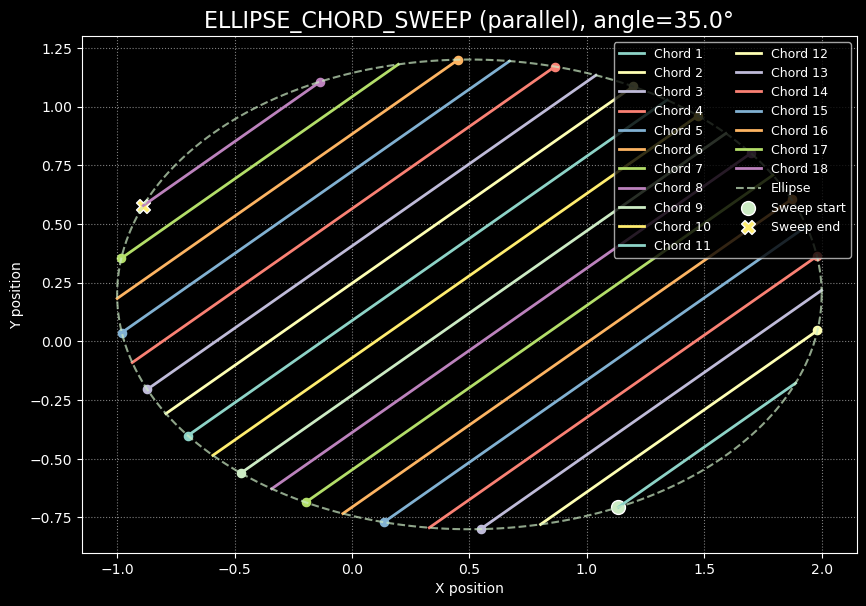

In [75]:
# --- Simulation + Plotting for ELLIPSE_CHORD_SWEEP ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# decide_move_increments(...) must include the 'ELLIPSE_CHORD_SWEEP' branch from earlier.

# ---------- Choose parameters ----------
strategy = 'ELLIPSE_CHORD_SWEEP'
strategy_state = {
    'xc': 0.5, 'yc': 0.2,     # ellipse center
    'rx': 1.5, 'ry': 1.0,     # semiaxes
    'angle_deg': 35.0,        # initial diagonal angle
    'step_along': 0.06,       # step size along each chord

    # Pick ONE sweep mode:

    # 1) Parallel (offset) chords:
    'sweep_mode': 'parallel',
    'num_lines': 18,          # number of parallel diagonals (fills edge-to-edge)
    # Optional: force fixed spacing instead of auto-spread:
    # 'd_step': 0.12,

    # 2) Or rotate angles instead of parallel offsets:
    # 'sweep_mode': 'rotate',
    # 'num_lines': 12,
    # 'angle_step_deg': 15.0,
}

current_metric = 0.0  # not used by this strategy; placeholder
strategy_state['strategy'] = strategy

# If you want to seed a starting position explicitly (optional):
# strategy_state['current_x'] = strategy_state['xc'] - strategy_state['rx']
# strategy_state['current_y'] = strategy_state['yc']

# ---------- Run and collect positions ----------
xs, ys = [], []
while strategy_state.get('strategy', strategy) != 'IDLE':
    inc_x, inc_y, strategy_state = decide_move_increments(
        strategy, strategy_state, current_metric
    )
    xs.append(strategy_state['current_x'])
    ys.append(strategy_state['current_y'])

# Save to CSV (optional)
df = pd.DataFrame({'x': xs, 'y': ys})
df.to_csv('ellipse_chord_sweep_path.csv', index=False)

# ---------- Helper: segment into chords (skip big jumps) ----------
def segment_chords(xs, ys, step_along, jump_factor=1.7):
    """
    Break the polyline into chord segments by detecting 'jump' steps
    that move much farther than the along-chord step size. Returns
    a list of segments, each segment = (x_list, y_list).
    """
    if not xs:
        return []

    segs = []
    cur_x, cur_y = [xs[0]], [ys[0]]
    thresh2 = (jump_factor * step_along) ** 2  # squared threshold

    for i in range(1, len(xs)):
        dx = xs[i] - xs[i-1]
        dy = ys[i] - ys[i-1]
        if dx*dx + dy*dy > thresh2:
            # new chord
            if len(cur_x) > 1:
                segs.append((cur_x, cur_y))
            cur_x, cur_y = [xs[i]], [ys[i]]
        else:
            cur_x.append(xs[i])
            cur_y.append(ys[i])

    if len(cur_x) > 1:
        segs.append((cur_x, cur_y))
    return segs

# ---------- Plot ----------
def plot_ellipse_chord_sweep(xs, ys, st, title=None):
    xc, yc = st['xc'], st['yc']
    rx, ry = st['rx'], st['ry']
    step_along = st['step_along']

    segs = segment_chords(xs, ys, step_along)

    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot each chord segment
    for k, (sx, sy) in enumerate(segs):
        ax.plot(sx, sy, linewidth=2.0, label=f'Chord {k+1}')
        # Mark chord start
        ax.scatter(sx[0], sy[0], s=35)

    # Overlay ellipse boundary
    theta = np.linspace(0, 2*np.pi, 480)
    x_ell = xc + rx * np.cos(theta)
    y_ell = yc + ry * np.sin(theta)
    ax.plot(x_ell, y_ell, linestyle='--', alpha=0.7, linewidth=1.5, label='Ellipse')

    # Start & end of the whole sweep
    if xs and ys:
        ax.scatter(xs[0], ys[0], s=100, marker='o', edgecolor='white', label='Sweep start')
        ax.scatter(xs[-1], ys[-1], s=100, marker='X', edgecolor='white', label='Sweep end')

    smode = st['sweep_mode']
    ang = st['angle_deg']
    ttl = title or f"ELLIPSE_CHORD_SWEEP ({smode}), angle={ang:.1f}°"
    ax.set_title(ttl, fontsize=16)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('X position')
    ax.set_ylabel('Y position')
    ax.grid(True, linestyle=':', alpha=0.5)
    ax.legend(loc='upper right', fontsize=9, ncol=2)

    plt.show()
    # plt.savefig('ellipse_chord_sweep_plot.png', dpi=200)

plot_ellipse_chord_sweep(xs, ys, strategy_state)
